IMPORTS

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt


In [4]:
from scipy.stats import binom,poisson,geom,hypergeom,uniform,expon, gamma, beta,chi2,t,pareto,lognorm

In [5]:
from random import randrange, random
import math

In [146]:
from pathlib import Path  


CREACIÓN SERIES TEMPORALES SEGÚN: PERIODOS / FIN

In [6]:
# A partir de una fecha de inicio y fecha de fin, devuelve la serie temporal desde la fecha de inicio a la fecha de fin con frequencias posibles:
# B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds

def series_fin(inicio, fin,freq):
    serie = pd.date_range(start=inicio, end=fin, freq=freq)
    return serie 

In [7]:
# A partir de una fecha de inicio y el número de periodos, devuelve la serie temporal desde la fecha de inicio a la fecha de fin con frequencias posibles:
# B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds

def series_periodos(inicio, periodos, freq): 
    serie = pd.date_range(start=inicio, periods=periodos, freq=freq)
    return serie

MODELOS DE TENDENCIA DETERMINISTA

TRES TIPOS DE TENDENCIA:

In [8]:
def tendencia_lineal (a,b,t):
    return a + b * t 

In [9]:
def tendencia_cuadratica (a,b,c,t):
    return a + b * t + c * t * t

In [10]:
def tendencia_determinista_lineal (a,b,t,e=0):
    return tendencia_lineal(a,b,t) + e

In [11]:
def tendencia_determinista_cuadratica(a,b,c,t,e=0):
    return tendencia_cuadratica(a,b,c,t) + e

In [12]:
def tendencia_determinista_exponencial(a,b,t,e=0):
    return math.exp(a+b*t+e)

Parámetros del modelo:
    - params: indica los parámetros de la tendencia.
    - tipo: Valores posibles:
        1. Tendencia determinista lineal (2 parámetros)
        2. Tendencia determinista cuadrática (3 parámetros)
        3. Tendencia determinista exponencial (2 parámetros)
    - num_datos: número de datos a generar
    - coef_error: indica el coeficiente de error (a mayor coeficiente, menor estacionariedad). Si el coef_error=0, los datos son estacionarios. 

In [13]:
def tendencia_det(params,tipo,num_datos,coef_error=0):
    
    datos = np.zeros(num_datos)
    
    for t in range(0,num_datos):
        e = random()*coef_error
        
        if tipo==1:
            datos[t] = tendencia_determinista_lineal(params[0],params[1],t,e)
        elif tipo==2:
            datos[t] = tendencia_determinista_cuadratica(params[0],params[1],params[2],t,e)
        elif tipo==3:
            datos[t] = tendencia_determinista_exponencial(params[0],params[1],t,e)
            
    return datos   

CREACIÓN DE DATOS SEGÚN CIERTAS DISTRIBUCIONES:

Parámetros:
- num_datos : numéro de datos a generar 
- Distr, params : Indica la distribución a seguir y los parámetros de esta distribución. Casos:
    1. Los parámetros son la media y la desv_típica de los datos. Sigue una distribución normal.
    2. Los parámetros son n (nº pruebas) y p (probabilidad éxito) de una distribución binomial. Además, podemos añadir otro parámetro que indica la localización de los datos.
    3. El parámetro es mu de una distribución poisson. Además, podemos añadir otro parámetro que indica la localización de los datos.
    4. El parámetro es p (probabilidad éxito) de una distribución geométrica. Además, podemos añadir otro parámetro que indica la localización de los datos.
    5. Los parámetros son M (tamaño población), n (nº aciertos) y N (tamño muestra) de una distribución hipergeométrica. Además, podemos añadir otro parámetro que indica la localización de los datos.
    6. El parámetro es el valor constante que toma los datos.
    7. Sigue una distribución uniforme. Puede no tener parámetros, indicar solo la localización o indicar la localización y escala. 
    8. El parámetro es s de una distribución lognormal. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    9. Sigue una distribución exponencial. Puede no tener parámetros, indicar solo la localización o indicar la localización y escala. 
    10. El parámetro es a de una distribución gamma. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    11. Los parámetros son a y b de una distribución beta. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    12. El parámetro es df de una distribución chi cuadrado. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    13. El parámetro es t de una distribución t-student. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    14. El parámetro es b de una distribución pareto. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    15. Sigue una distribución lineal descendente cuyos parámetros son el dato inicial y la pendiente (en valor absoluto). El mínimo valor posible es cero, si se alcanza los datos se mantienen constante con ese valor. 
    16. Sigue una distribución lineal ascendente cuyos parámetros son el dato inicial y la pendiente. 
    17. Obtienes números aleatorios cuyos valores oscilan entre el primer parámetro y el segundo.

In [14]:
def crear_datos(distr,params,num_datos):
    
    if distr == 1 :
        datos = np.random.normal(params[0],params[1],num_datos)
        
    elif distr ==2 :
        if len(params)==2:
            datos = binom.rvs(params[0],params[1],size=num_datos)
        elif len(params) == 3:
            datos = binom.rvs(params[0],params[1],params[2],size=num_datos)
            
    elif distr== 3 :
        if len(params)==1:
            datos = poisson.rvs(params[0],size=num_datos)
        elif len(params) == 2:
            datos = poisson.rvs(params[0],params[1],size=num_datos)
            
    elif distr == 4 :
        if len(params)==1:
            datos = geom.rvs(params[0],size=num_datos)
        elif len(params) == 2:
            datos = geom.rvs(params[0],params[1],size=num_datos)
            
    elif distr == 5:
        if len(params)==3:
            datos = hypergeom.rvs(params[0],params[1],params[2],size=num_datos)
        elif len(params) == 4:
            datos = hypergeom.rvs(params[0],params[1],params[2],params[3],size=num_datos)
            
    elif distr == 6: 
        datos = np.zeros(num_datos) + params[0]
        
    elif distr == 7:
        if len(params)==0:
            datos = uniform.rvs(size=num_datos)
        elif len(params)==1:
            datos = uniform.rvs(params[0],size=num_datos)
        elif len(params) == 2:
            datos = uniform.rvs(params[0],params[1],size=num_datos)
            
    elif distr == 8:
        if len(params)==1:
            datos = lognorm.rvs(params[0],size=num_datos)
        elif len(params) == 2:
            datos = lognorm.rvs(params[0],params[1],size=num_datos)
        elif len(params) == 3:
            datos = lognorm.rvs(params[0],params[1],params[2],size=num_datos)
            
    elif distr == 9: 
        if len(params)==0:
            datos = expon.rvs(size=num_datos)
        elif len(params)==1:
            datos = expon.rvs(params[0],size=num_datos)
        elif len(params) == 2:
            datos = expon.rvs(params[0],params[1],size=num_datos)
            
    elif distr == 10: 
        if len(params)==1:
            datos = gamma.rvs(params[0],size=num_datos)
        elif len(params) == 2:
            datos = gamma.rvs(params[0],params[1],size=num_datos)
        elif len(params) == 3:
            datos = gamma.rvs(params[0],params[1],params[2],size=num_datos)
            
    elif distr == 11: 
        if len(params)==2:
            datos = beta.rvs(params[0],params[1],size=num_datos)
        elif len(params) == 3:
            datos = beta.rvs(params[0],params[1],params[2],size=num_datos)
        elif len(params) == 4:
            datos = beta.rvs(params[0],params[1],params[2],params[3],size=num_datos)
            
    elif distr == 12: 
        if len(params)==1:
            datos = chi2.rvs(params[0],size=num_datos)
        elif len(params) == 2:
            datos = chi2.rvs(params[0],params[1],size=num_datos)
        elif len(params) == 3:
            datos = chi2.rvs(params[0],params[1],params[2],size=num_datos)
            
    elif distr == 13: 
        if len(params)==1:
            datos = t.rvs(params[0],size=num_datos)
        elif len(params) == 2:
            datos = t.rvs(params[0],params[1],size=num_datos)
        elif len(params) == 3:
            datos = t.rvs(params[0],params[1],params[2],size=num_datos)
            
    elif distr == 14: 
        if len(params)==1:
            datos = pareto.rvs(params[0],size=num_datos)
        elif len(params) == 2:
            datos = pareto.rvs(params[0],params[1],size=num_datos)
        elif len(params) == 3:
            datos = pareto.rvs(params[0],params[1],params[2],size=num_datos)
            
    elif distr == 15:
        datos = np.zeros(num_datos)
        datos[0]= params[0]
        i=1
        while datos[i-1]>0 and i<num_datos:
            datos[i] = datos[i-1] - params[1]
            i= i+1
            
    elif distr == 16:
        datos = np.zeros(num_datos)
        datos[0] = params[0]
        for i in range(1,num_datos):
            datos[i] = datos[i-1] + params[1]
    
    elif distr == 17:
        datos= np.zeros(num_datos)
        for i in range(0,num_datos):
            datos[i] = randrange(params[0],params[1])
        
    return datos

MODELOS PERIÓDICOS

CREACIÓN DE MODELOS DE DATOS PERIÓDICOS A PARTIR DE UNA DISTRIBUCIÓN SABIENDO EL NÚMERO DE DATOS A GENERAR Y ALGUNA DE LAS SIGUIENTES OPCIONES:
    1. AMPLITUD PERIODO
    2. NÚMERO DE PERIODOS

Parámetros:
    - distr, params : indica la distribución que van a seguir los datos en cada periodo y los parámetros de esta distribución.
    - num_datos: indica el número de datos a crear.
    - periodo: indica el número de datos de cada periodo.

In [15]:
def datos_periodicos_amplitud(distr,params,num_datos,periodo):
    
    num_periodos = int(num_datos/periodo)
    datos_base0 = crear_datos(distr,params,periodo)
    datos_base = datos_base0
    for i in range(0,num_periodos-1):
        datos_base=np.concatenate((datos_base0,datos_base))
    return datos_base

Parámetros:
    - distr, params : indica la distribución que van a seguir los datos en cada periodo y los parámetros de esta distribución.
    - num_datos: indica el número de datos a crear.
    - num_periodos: indica el número de periodos

In [16]:
def datos_periodicos_cantidad(distr,params,num_datos,num_periodos):
    periodo = int(num_datos/num_periodos)
    datos_base0 = crear_datos(distr,params,periodo)
    datos_base = datos_base0
    for i in range(0,num_periodos-1):
        datos_base=np.concatenate((datos_base0,datos_base))
    return datos_base

MODELOS AUTORREGRESIVOS

Parámetros:
    - c, phi, a : parámetros del modelo autorregresivo. Nota: a guarda los valores iniciales en sus primeras posiciones.
    - num_datos: numéro de datos a crear 
    - distr,params: necesarios para la creación de datos de a ,en el caso de que pasemos como parámetro un array vacío. Indica la distribución con la que se inicializará a y los parámetros de esta distribución 

In [17]:
def modelo_AR(c,phi,distr,params,num_datos,a=[]):
    
    orden = len(phi)
    
    if len(a)==0: 
        a = crear_datos(distr,params,num_datos)
    
    datos = np.zeros(num_datos)
    
    for k in range(0,orden):
        datos[k] = a[k]
            
    for i in range(orden,num_datos):
        datos [i]= c + a[i]
        for j in range (1,orden+1):
            datos[i] = datos[i] + phi[j-1]*datos[i-j]
    
    return datos

MODELOS DE MEDIAS MOVILES

Parámetros:
    - c, teta, a : parámetros del modelo de medias móviles. Nota: a guarda los valores iniciales en sus primeras posiciones
    - num_datos: numéro de datos a crear 
    - distr,params: necesarios para la creación de a, en el caso de que pasemos como parámetro un array vacío. Indica la distribución con la que se inicializará a y los parámetros de esta distribución.

In [18]:
def modelo_MA(c,teta,distr,params,num_datos,a=[]):
    
    orden = len(teta)
    
    if len(a)==0:  
        a = crear_datos(distr,params,num_datos)
    
    datos = np.zeros(num_datos)
    for i in range(0,orden):
        datos[i]= a[i]
            
    for i in range(orden,num_datos):
        datos[i] = c + a[i]
        for j in range (1,orden+1):
            datos[i]= datos[i] + teta[j-1]*a[i-j]
            
    return datos

MODELO ARMA 

Parámetros:
    - c, phi, teta, a : parámetros del modelo de autorregresivo y de medias móviles. Nota: a guarda los valores iniciales en sus primeras posiciones
    - num_datos: numéro de datos a crear 
    - distr,params: necesarios para la creación de a, en el caso de que pasemos como parámetro un array vacío. Indica la distribución con la que se inicializará a y los parámetros de esta distribución.

In [19]:
def modelo_ARMA(c,phi,teta,distr,params,num_datos,a=[]):
    
    if len(a)==0:  
        a = crear_datos(distr,params,num_datos)
    
    datos = np.zeros(num_datos)
    p = len(phi)
    q = len(teta)   
    maxi = max(p,q)
    
    for k in range(0,maxi):
        datos[k] = a[k]
            
    for i in range(maxi,num_datos):
        datos[i] = c + a[i]
            
        for j in range (1,p+1):
            datos[i]= datos[i] + phi[j-1]*datos[i-j]
                
        for k in range(1,q+1):
            datos[i] = datos[i] + teta[k-1]*a[i-k]   
                
    return datos
    

MODELOS ESTACIONALES 

AUTORREGRESIVOS

Parámetros:
    - c, phi, a: parámetros del modelo autorregresivo. Nota: a guarda los valores iniciales en sus primeras posiciones
    - s: estacionalidad, tamaño de una estación (número de datos que hay en cada estación)
    - num_datos: numéro de datos a crear 
    - distr,params: necesarios para la creación de a, en el caso de que pasemos como parámetro un array vacío. Indica la distribución con la que se inicializará a y los parámetros de esta distribución.

In [20]:
def modelo_AR_estacional(c,phi,s,distr,params,num_datos,a=[]):
    
    if len(a)==0: 
        a = crear_datos(distr,params,num_datos)
    
    datos = np.zeros(num_datos)
    orden = len(phi)
    for k in range(0,s*orden):
        datos[k] = a[k]
            
    for i in range(orden*s,num_datos):
        datos [i]= c + a[i]
        for j in range (1,orden+1):
            datos[i] = datos[i] + phi[j-1]*datos[i-j*s]
    
    return datos

MEDIAS MÓVILES

Parámetros:
    - c, teta, a : parámetros del modelo de medias móviles. Nota: a guarda los valores iniciales en sus primeras posiciones
    - s : estacionalidad, tamaño de una estación (número de datos que hay en cada estación)
    - num_datos: numéro de datos a crear 
    - distr,params: necesarios para la creación de a en el caso de que no lo pasemos como parámetro. Indica la distribución con la que se inicializará a y los parámetros de esta distribución.

In [21]:
def modelo_MA_estacional(c,teta,s,distr,params,num_datos,a=[]):
    
    if len(a)==0: 
        a = crear_datos(distr,params,num_datos)
    
    datos = np.zeros(num_datos)
    orden = len(teta)
    
    for i in range(0,s*orden):
        datos[i]= a[i]
            
    for i in range(s*orden,num_datos):
        datos[i] = c + a[i]
        for j in range (1,orden+1):
            datos[i]= datos[i] + teta[j-1]*a[i-j*s]
                
    return datos

ARMA

Parámetros:
    - c, phi, teta, a : parámetros del modelo de autorregresivo y de medias móviles. Nota: a guarda los valores iniciales en sus primeras posiciones
    - s : estacionalidad, tamaño de una estación (número de datos que hay en cada estación)
    - num_datos: numéro de datos a crear 
    - distr,params: necesarios para la creación de a, en el caso de que no lo pasemos como parámetro. Indica la distribución con la que se inicializará a y los parámetros de esta distribución.

In [22]:
def modelo_ARMA_estacional(c,phi,teta,s,distr,params,num_datos,a=[]):
    
    if len(a)==0:  
        a = crear_datos(distr,params,num_datos)
    
    datos = np.zeros(num_datos)
    p = len(phi)
    q = len(teta)
    maxi = max(p,q)
    
    for k in range(0,s*maxi):
        datos[k] = a[k]
            
    for i in range(s*maxi,num_datos):
        datos[i] = c + a[i]
            
        for j in range (1,p+1):
            datos[i]= datos[i] + phi[j-1]*datos[i-j*s]
                
        for k in range(1,q+1):
            datos[i] = datos[i] + teta[k-1]*a[i-k*s]   
                
    return datos

Parámetros:
    - c, phi, teta,a : parámetros del modelo de autorregresivo y de medias móviles. Nota: a guarda los valores iniciales en sus primeras posiciones.
    - p y q : órdenes del modelo. Casos: 
        1. p=0 : modelo de medias móviles.
        2. q=0 : modelo autorregresivos.
        3. p>0 y q>0 : modelo ARMA.
    - s : estacionalidad, tamaño de una estación (número de datos que hay en cada estación). Casos:
        1. s>0: modelo estacional.
        2. s=0: modelo no estacional
    - num_datos: numéro de datos a crear 
    - distr,params: necesarios para la creación de a en el caso de que pasemos como parámetro un array vacío. Indica la distribución con la que se inicializará a y los parámetros de esta distribución.

In [23]:
def creacion_modelos_ARMA(c,distr,params,num_datos,s=0,phi=[],teta=[],a=[]):
    
    p = len(phi)
    q = len(teta)
    
    if s == 0:
        if q == 0:
            datos = modelo_AR(c,phi,distr,params,num_datos,a)
            
        elif p == 0: 
            datos = modelo_MA(c,teta,distr,params,num_datos,a)
        else:
            datos = modelo_ARMA(c,phi,teta,distr,params,num_datos,a)
    else :
        if q == 0:
            datos = modelo_AR_estacional(c,phi,s,distr,params,num_datos,a)
            
        elif p == 0: 
            datos = modelo_MA_estacional(c,teta,s,distr,params,num_datos,a)
        else:
            datos = modelo_ARMA_estacional(c,phi,teta,s,distr,params,num_datos,a)
            
    return datos 

DRIFT CAMBIO DISTRIBUCIONES:

TIPOS DE DRIFT:
    1. CAMBIO DE DISTRIBUCIONES CREADAS CON CREAR_DATOS
    2. CAMBIO DE DISTRIBUCIÓN CREAR_DATOS A MODELOS ARMA
    3. CAMBIO DE DISTRIBUCIÓN CREAR_DATOS A PERIÓDICOS
    4. CAMBIO DE DISTRIBUCIÓN CREAR_DATOS A TENDENCIAS DETERMINISTAS 
    5. CAMBIO DE MODELO ARMA A MODELO ARMA
    6. CAMBIO DE MODELO ARMA A DISTRIBUCIÓN CREAR DATOS 
    7. CAMBIO DE MODELO ARMA A PERIODICOS 
    8. CAMBIO DE MODELO ARMA A TENDENCIAS DETERMINISTAS
    9. CAMBIO DE PERIÓDICOS A PERIÓDICOS
    10. CAMBIO DE PERIÓDICOS A DISTRIBUCIONES DE CREAR_DATOS
    11. CAMBIO DE PERIODICOS A MODELOS ARMA
    12. CAMBIO DE PERIÓDICOS A TENDENCIAS DETERMINISTAS
    13. CAMBIO DE TENDENCIAS DETERMINISTAS A TENDENCIAS DETERMINISTAS 
    14. CAMBIO DE TENDENCIAS DETERMINISTAS A DISTRIBUCIONES CON CREAR_DATOS
    15. CAMBIO DE TENDENCIAS DETERMINISTAS A MODELOS ARMA
    16. CAMBIO DE TENDENCIAS DETERMINISTAS A PERIÓDICOS

Parámetros:
    - params1,params2 : parámetros necesarios para crear los datos pervios y posteriores al drift. Casos:
        1. DISTRIBUCIONES CREADAS CON CREAR DATOS: los parámetros son distr y parametros que indica la distribución y los parámetros de la distribución.
        2. MODELOS ARMA: los parámetros son los del modelo arma, es decir, c, phi, teta, a, s, distr y params.
        3. DATOS PERIODICOS: los parametros son el tipo (1 indica que se ha pasado la amplitud del periodo y 2 la cantidad de periodos) y distr, params y p (indica el número de periodos o su amplitud) necesarios para crear los datos periódicos con periodo p / número de periodos p siguiendo una distribución con paramétros params.
        4. TENDENCIA DETERMINISTA: los parámetros son el tipo de tendencia, los coeficientes del modelo de tendencia determinista y el coeficiente de error.  
    - tipo: tipo de drift.
    - num_drift: número de datos previos al drift.
    - num_datos: número de datos totales.

In [24]:
def crear_drift(params1,params2,tipo,num_drift,num_datos):
    
    if tipo==1:
        distr1=params1[0]
        parametros1=params1[1]
        datos1 = crear_datos(distr1,parametros1,num_drift)
        
        distr2=params2[0]
        parametros2=params2[1]
        datos2 = crear_datos(distr2,parametros2,num_datos-num_drift)
        
    elif tipo==2:
        distr1=params1[0]
        parametros1=params1[1]
        datos1 = crear_datos(distr1,parametros1,num_drift)
        
        c = params2[0]
        distr = params2[1]
        parametros2 = params2[2]
        s = params2[3]
        phi = params2[4]
        teta = params2[5]
        a = params2[6]
        datos2 = creacion_modelos_ARMA(c,distr,parametros2,num_datos-num_drift,s,phi,teta,a)
    
    elif tipo==3:
        distr1=params1[0]
        parametros1=params1[1]
        datos1 = crear_datos(distr1,parametros1,num_drift)
        
        tipo2 = params2[0]
        distr,parametros2,p = params2[1],params2[2],params2[3]
        if tipo2==1:
            datos2=datos_periodicos_amplitud(distr,parametros2,num_datos-num_drift,p)
        elif tipo2==2:
            datos2=datos_periodicos_cantidad(distr,parametros2,num_datos-num_drift,p)
            
    elif tipo==4:
        distr1=params1[0]
        parametros1=params1[1]
        datos1 = crear_datos(distr1,parametros1,num_drift)
        
        parametros2,tipo2,coef_error = params2[0],params2[1],params2[2]
        datos2=tendencia_det(parametros2,tipo2,num_datos-num_drift,coef_error)
    
    elif tipo==5:
        c = params1[0]
        distr = params1[1]
        parametros1 = params1[2]
        s = params1[3]
        phi = params1[4]
        teta = params1[5]
        a = params1[6]
        datos1 = creacion_modelos_ARMA(c,distr,parametros1,num_drift,s,phi,teta,a)
        
        c2 = params2[0]
        distr2 = params2[1]
        parametros2 = params2[2]
        s2 = params2[3]
        phi2 = params2[4]
        teta2 = params2[5]
        a2 = params2[6]
        datos2 = creacion_modelos_ARMA(c2,distr2,parametros2,num_datos-num_drift,s2,phi2,teta2,a2)
        
    elif tipo==6: 
        
        c = params1[0]
        distr = params1[1]
        parametros1 = params1[2]
        s = params1[3]
        phi = params1[4]
        teta = params1[5]
        a = params1[6]
        datos1 = creacion_modelos_ARMA(c,distr,parametros1,num_drift,s,phi,teta,a)
        
        distr2=params2[0]
        parametros2=params2[1]
        datos2 = crear_datos(distr2,parametros2,num_datos - num_drift)
  
        
    elif tipo==7: 
        c = params1[0]
        distr = params1[1]
        parametros1 = params1[2]
        s = params1[3]
        phi = params1[4]
        teta = params1[5]
        a = params1[6]
        datos1 = creacion_modelos_ARMA(c,distr,parametros1,num_drift,s,phi,teta,a)

        tipo2 = params2[0]
        distr,param,p = params2[1],params2[2],params2[3]
        if tipo2==1:
            datos2=datos_periodicos_amplitud(distr,param,num_datos-num_drift,p)
        elif tipo2==2:
            datos2=datos_periodicos_cantidad(distr,param,num_datos-num_drift,p)
            
    elif tipo==8:
        
        c = params1[0]
        distr = params1[1]
        parametros1 = params1[2]
        s = params1[3]
        phi = params1[4]
        teta = params1[5]
        a = params1[6]
        datos1 = creacion_modelos_ARMA(c,distr,parametros1,num_drift,s,phi,teta,a)
    
        param,tipo2,coef_error = params2[0],params2[1],params2[2]
        datos2 = tendencia_det(param,tipo2,num_datos-num_drift,coef_error)  
         
    elif tipo==9: 
        tipo1 = params1[0]
        distr,params,p = params1[1],params1[2],params1[3]
        if tipo1==1:
            datos1=datos_periodicos_amplitud(distr,params,num_drift,p)
        elif tipo1==2:
            datos1=datos_periodicos_cantidad(distr,params,num_drift,p)
            
        tipo2 = params2[0]
        distr,param,p = params2[1],params2[2],params2[3]
        if tipo2==1:
            datos2=datos_periodicos_amplitud(distr,param,num_datos-num_drift,p)
        elif tipo2==2:
            datos2=datos_periodicos_cantidad(distr,param,num_datos-num_drift,p)
    
    elif tipo==10:
        tipo1 = params1[0]
        distr,params,p = params1[1],params1[2],params1[3]
        if tipo1==1:
            datos1=datos_periodicos_amplitud(distr,params,num_drift,p)
        elif tipo1==2:
            datos1=datos_periodicos_cantidad(distr,params,num_drift,p)
            
        distr2=params2[0]
        parametros2=params2[1]
        datos2 = crear_datos(distr2,parametros2,num_datos - num_drift)   
        
    elif tipo == 11:
        tipo1 = params1[0]
        distr,params,p = params1[1],params1[2],params1[3]
        if tipo1==1:
            datos1=datos_periodicos_amplitud(distr,params,num_drift,p)
        elif tipo1==2:
            datos1=datos_periodicos_cantidad(distr,params,num_drift,p)
            
        c2 = params2[0]
        distr2 = params2[1]
        parametros2 = params2[2]
        s2 = params2[3]
        phi2 = params2[4]
        teta2 = params2[5]
        a2 = params2[6]
        datos2 = creacion_modelos_ARMA(c2,distr2,parametros2,num_datos-num_drift,s2,phi2,teta2,a2)  
          
    elif tipo==12:
        tipo1 = params1[0]
        distr,params,p = params1[1],params1[2],params1[3]
        if tipo1==1:
            datos1=datos_periodicos_amplitud(distr,params,num_drift,p)
        elif tipo1==2:
            datos1=datos_periodicos_cantidad(distr,params,num_drift,p)
            
        param,tipo2,coef_error = params2[0],params2[1],params2[2]
        datos2=tendencia_det(param,tipo2,num_datos-num_drift,coef_error)  
           
    elif tipo==13:
        params,tipo1,coef_error = params1[0],params1[1],params1[2]
        datos1=tendencia_det(params,tipo1,num_drift,coef_error) 
        
        param,tipo2,coef_error2 = params2[0],params2[1],params2[2]
        datos2=tendencia_det(param,tipo2,num_datos-num_drift,coef_error2) 
         
    elif tipo==14:
        params,tipo1,coef_error = params1[0],params1[1],params1[2]
        datos1=tendencia_det(params,tipo1,num_drift,coef_error) 
        
        distr2=params2[0]
        parametros2=params2[1]
        datos2 = crear_datos(distr2,parametros2,num_datos - num_drift)
        
    elif tipo==15:
        params,tipo1,coef_error = params1[0],params1[1],params1[2]
        datos1=tendencia_det(params,tipo1,num_drift,coef_error) 
        
        c2 = params2[0]
        distr2 = params2[1]
        parametros2 = params2[2]
        s2 = params2[3]
        phi2 = params2[4]
        teta2 = params2[5]
        a2 = params2[6]
        datos2 = creacion_modelos_ARMA(c2,distr2,parametros2,num_datos-num_drift,s2,phi2,teta2,a2)
        
    elif tipo==16: 
        params,tipo1,coef_error = params1[0],params1[1],params1[2]
        datos1=tendencia_det(params,tipo1,num_drift,coef_error) 
        
        tipo2 = params2[0]
        distr,param,p = params2[1],params2[2],params2[3]
        if tipo2==1:
            datos2=datos_periodicos_amplitud(distr,param,num_datos-num_drift,p)
        elif tipo2==2:
            datos2=datos_periodicos_cantidad(distr,param,num_datos-num_drift,p)
             
    datos = np.concatenate((datos1,datos2))
    return datos 

CREACIÓN DE DATAFRAMES

SEGÚN UN MODELO DE TENDENCIA DETERMINISTA

Parámetros: 
    - params: indica los parámetros de la tendencia.
    - tipo: Valores posibles:
        1. Tendencia determinista lineal
        2. Tendencia determinista cuadrática
        3. Tendencia determinista exponencial
    - inicio, fin: fecha inicio y fin de la serie temporal.
    - columna: nombre de la columna
    - freq: B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds
    - coef_error: indica el coeficiente de error (a mayor coeficiente, menor estacionariedad). Si el coef_error=0, los datos son estacionarios. 

In [25]:
def crear_df_fin_tend_det(inicio,fin,freq,columna,params,tipo,coef_error=0):
    indice = series_fin(inicio,fin,freq)
    num_datos = indice.size
    datos = tendencia_det(params,tipo,num_datos,coef_error)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    df.plot(title='Serie Temporal',figsize=(13,5))
    return df

Parámetros: 
    - params: indica los parámetros de la tendencia.
    - tipo: Valores posibles:
        1. Tendencia determinista lineal
        2. Tendencia determinista cuadrática
        3. Tendencia determinista exponencial
    - inicio, periodos: fecha inicio y nº de periodos.
    - columna: nombre de la columna 
    - freq: B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds
    - coef_error: indica el coeficiente de error (a mayor coeficiente, menor estacionariedad). Si el coef_error=0, los datos son estacionarios. 

In [26]:
def crear_df_periodos_tend_det(inicio,periodos,freq,columna,params,tipo,coef_error=0):
    indice = series_periodos(inicio,periodos,freq)
    num_datos = indice.size
    datos = tendencia_det(params,tipo,num_datos,coef_error)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    df.plot(title='Serie Temporal',figsize=(13,5))
    return df

SEGÚN EL MODELO DE DISTRIBUCIONES DE CREAR_DATOS:

Parámetros:
- inicio, fin: fecha inicio y fin de la serie temporal.
- columna: nombre de la columna
- freq: B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds
- Distr, params : Indica la distribución a seguir y los parámetros de esta distribución. Casos:
    1. Los parámetros son la media y la desv_típica de los datos. Sigue una distribución normal.
    2. Los parámetros son n (nº pruebas) y p (probabilidad éxito) de una distribución binomial. Además, podemos añadir otro parámetro que indica la localización de los datos.
    3. El parámetro es mu de una distribución poisson. Además, podemos añadir otro parámetro que indica la localización de los datos.
    4. El parámetro es p (probabilidad éxito) de una distribución geométrica. Además, podemos añadir otro parámetro que indica la localización de los datos.
    5. Los parámetros son M (tamaño población), n (nº aciertos) y N (tamño muestra) de una distribución hipergeométrica. Además, podemos añadir otro parámetro que indica la localización de los datos.
    6. El parámetro es el valor constante que toma los datos.
    7. Sigue una distribución uniforme. Puede no tener parámetros, indicar solo la localización o indicar la localización y escala. 
    8. El parámetro es s de una distribución lognormal. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    9. Sigue una distribución exponencial. Puede no tener parámetros, indicar solo la localización o indicar la localización y escala. 
    10. El parámetro es a de una distribución gamma. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    11. Los parámetros son a y b de una distribución beta. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    12. El parámetro es df de una distribución chi cuadrado. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    13. El parámetro es t de una distribución t-student. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    14. El parámetro es b de una distribución pareto. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    15. Sigue una distribución lineal descendente cuyos parámetros son el dato inicial y la pendiente (en valor absoluto). El mínimo valor posible es cero, si se alcanza los datos se mantienen constante con ese valor. 
    16. Sigue una distribución lineal ascendente cuyos parámetros son el dato inicial y la pendiente. 
    17. Obtienes números aleatorios cuyos valores oscilan entre el primer parámetro y el segundo.

In [27]:
def crear_df_fin_datos(inicio,fin,freq,columna,distr,params):
    
    indice = series_fin(inicio,fin,freq)
    num_datos = indice.size
    datos = crear_datos(distr,params,num_datos)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    df.plot(title='Serie Temporal',figsize=(13,5))
    return df 

Parámetros:
- inicio, periodos: fecha inicio y nº periodos de la serie temporal. 
- columna: nombre de la columna
- freq: B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds
- Distr, params : Indica la distribución a seguir y los parámetros de esta distribución. Casos:
    1. Los parámetros son la media y la desv_típica de los datos. Sigue una distribución normal.
    2. Los parámetros son n (nº pruebas) y p (probabilidad éxito) de una distribución binomial. Además, podemos añadir otro parámetro que indica la localización de los datos.
    3. El parámetro es mu de una distribución poisson. Además, podemos añadir otro parámetro que indica la localización de los datos.
    4. El parámetro es p (probabilidad éxito) de una distribución geométrica. Además, podemos añadir otro parámetro que indica la localización de los datos.
    5. Los parámetros son M (tamaño población), n (nº aciertos) y N (tamño muestra) de una distribución hipergeométrica. Además, podemos añadir otro parámetro que indica la localización de los datos.
    6. El parámetro es el valor constante que toma los datos.
    7. Sigue una distribución uniforme. Puede no tener parámetros, indicar solo la localización o indicar la localización y escala. 
    8. El parámetro es s de una distribución lognormal. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    9. Sigue una distribución exponencial. Puede no tener parámetros, indicar solo la localización o indicar la localización y escala. 
    10. El parámetro es a de una distribución gamma. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    11. Los parámetros son a y b de una distribución beta. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    12. El parámetro es df de una distribución chi cuadrado. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    13. El parámetro es t de una distribución t-student. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    14. El parámetro es b de una distribución pareto. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    15. Sigue una distribución lineal descendente cuyos parámetros son el dato inicial y la pendiente (en valor absoluto). El mínimo valor posible es cero, si se alcanza los datos se mantienen constante con ese valor. 
    16. Sigue una distribución lineal ascendente cuyos parámetros son el dato inicial y la pendiente. 
    17. Obtienes números aleatorios cuyos valores oscilan entre el primer parámetro y el segundo.

In [28]:
def crear_df_periodos_datos(inicio,periodos,freq,columna,distr,params):
    
    indice = series_periodos(inicio,periodos,freq)
    datos = crear_datos(distr,params,periodos)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    df.plot(title='Serie Temporal',figsize=(13,5))
    return df 

SEGÚN MODELOS PERIÓDICOS:

Parámetros: 
    - inicio, fin: fecha de inicio y fin de la serie temporal.
    - freq: B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds.
    - columna: nombre de la columna 
    - distr, params: indica la distribución y los parámetros que siguen los datos
    - p: indica la cantidad de periodos/ la amplitud de los periodos
    - tipo: valores posibles
        1. p = amplitud de periodo
        2. p = número de periodos

In [29]:
def crear_df_fin_periodicos(inicio,fin,freq,columna,distr,params,p,tipo):
    indice = series_fin(inicio,fin,freq)
    num_datos = indice.size
    if tipo==1:
        datos = datos_periodicos_amplitud(distr,params,num_datos,p)
    elif tipo ==2:
        datos=datos_periodicos_cantidad(distr,params,num_datos,p)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    df.plot(title='Serie Temporal',figsize=(13,5))
    return df 

Parámetros: 
    - inicio, periodos: fecha de inicio y nº de periodos de la serie temporal.
    - freq: B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds.
    - columna: nombre de la columna 
    - distr, params: indica la distribución y los parámetros que siguen los datos
    - p: indica la cantidad de periodos/ la amplitud de los periodos
    - tipo: valores posibles
        1. p = amplitud de periodo
        2. p = número de periodos

In [30]:
def crear_df_periodos_periodicos(inicio,periodos,freq,columna,distr,params,p,tipo):
    indice = series_periodos(inicio,periodos,freq)
    num_datos = indice.size
    if tipo==1:
        datos = datos_periodicos_amplitud(distr,params,num_datos,p)
    elif tipo==2:
        datos=datos_periodicos_cantidad(distr,params,num_datos,p)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    df.plot(title='Serie Temporal',figsize=(13,5))
    return df 

SEGÚN MODELOS AUTORREGRESIVOS Y DE MEDIAS MÓVILES: 

Parámetros: 
    - c, phi, teta, a : parámetros del modelo de autorregresivo y de medias móviles. Nota: a guarda los valores iniciales en sus primeras posiciones
    - s : estacionalidad, tamaño de una estación (número de datos que hay en cada estación)
    - num_datos: numéro de datos a crear 
    - distr,params: necesarios para la creación de a en el caso de que pasemos como parámetro un array vacío
    - inicio, fin: indica la fecha de inicio y fin de la serie temporal.
    - freq: B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds.
    - columna: nombre de la columna 

In [31]:
def crear_df_fin_ARMA(inicio,fin,freq,columna,c,distr,params,s=0,phi=[],teta=[],a=[]):
    indice = series_fin(inicio,fin,freq)
    num_datos = indice.size
    datos=creacion_modelos_ARMA(c,distr,params,num_datos,s,phi,teta,a)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    df.plot(title='Serie Temporal',figsize=(13,5))
    return df 

Parámetros:
    - c, phi, teta, a : parámetros del modelo de autorregresivo y de medias móviles. Nota: a guarda los valores iniciales en sus primeras posiciones
    - s : estacionalidad, tamaño de una estación (número de datos que hay en cada estación)
    - num_datos: numéro de datos a crear 
    - distr,params: necesarios para la creación de a en el caso de que pasemos como parámetro un array vacío
    - inicio, periodos: indica la fecha de inicio y nº de periodos de la serie temporal.
    - freq: B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds.
    - columna: nombre de la columna

In [32]:
def crear_df_periodos_ARMA(inicio,periodos,freq,columna,c,distr,params,s=0,phi=[],teta=[],a=[]):
    indice = series_periodos(inicio,periodos,freq)
    datos=creacion_modelos_ARMA(c,distr,params,periodos,s,phi,teta,a)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    df.plot(title='Serie Temporal',figsize=(13,5))
    return df 

MODELOS CON DRIFT 

Parámetros:
    - params1,params2 : parámetros necesarios para crear los datos pervios y posteriores al drift. Casos:
        1. DISTRIBUCIONES CREADAS CON CREAR DATOS: los parámetros son distr y parametros que indica la distribución y los parámetros de la distribución.
        2. MODELOS ARMA: los parámetros son los del modelo arma,es decir, c, phi, teta, a, p, q, s, distr y params.
        3. DATOS PERIODICOS: los parametros son el tipo (1 indica que se ha pasado la amplitud del periodo y 2 la cantidad de periodos) y distr, params y p (indica el número de periodos o su amplitud) necesarios para el crear los datos periódicos.
        4. TENDENCIA DETERMINISTA: los parámetros son el tipo de tendencia, los parámetros del modelo y el coeficiente de error.  
    - tipo: tipo de drift.
    - num_drift: número de datos previos al drift.
    - inicio,fin: indica la fecha de inicio y fin de la serie temporal.
    - freq: B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds.
    - columna: nombre de la columna

In [33]:
def crear_df_fin_DRIFT(inicio,fin,freq,columna,params1,params2,tipo,num_drift):
    indice = series_fin(inicio,fin,freq)
    num_datos = indice.size
    datos = crear_drift(params1,params2,tipo,num_drift,num_datos)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    df.plot(title='Serie Temporal',figsize=(13,5))
    return df 

Parámetros:
    - params1,params2 : parámetros necesarios para crear los datos pervios y posteriores al drift. Casos:
        1. DISTRIBUCIONES CREADAS CON CREAR DATOS: los parámetros son distr y parametros que indica la distribución y los parámetros de la distribución.
        2. MODELOS ARMA: los parámetros son los del modelo arma,es decir, c, phi, teta, a, p, q, s, distr y params.
        3. DATOS PERIODICOS: los parametros son el tipo (1 indica que se ha pasado la amplitud del periodo y 2 la cantidad de periodos) y distr, params y p (indica el número de periodos o su amplitud) necesarios para el crear los datos periódicos.
        4. TENDENCIA DETERMINISTA: los parámetros son el tipo de tendencia, los parámetros del modelo y el coeficiente de error.  
    - tipo: tipo de drift.
    - num_drift: número de datos previos al drift.
    - inicio, periodos: indica la fecha de inicio y nº de periodos de la serie temporal.
    - freq: B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds.
    - columna: nombre de la columna

In [34]:
def crear_df_periodos_DRIFT(inicio,periodos,freq,columna,params1,params2,tipo,num_drift):
    indice = series_periodos(inicio,periodos,freq)
    datos = crear_drift(params1,params2,tipo,num_drift,periodos)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    df.plot(title='Serie Temporal',figsize=(13,5))
    return df 

EJEMPLOS

In [35]:
fecha1='1/1/2018'

In [36]:
fecha2='1/1/2024'

In [37]:
columna=['Valor']

In [38]:
periodos=84

MODELO DE TENDENCIA DETERMINISTA:

LINEAL (tipo=1)

,Valor
2018-01-31,50.098237
2018-02-28,50.275744
2018-03-31,50.588398
2018-04-30,50.793249
2018-05-31,50.936097
...,...
2023-08-31,63.493027
2023-09-30,63.743918
2023-10-31,63.921462
2023-11-30,64.132855


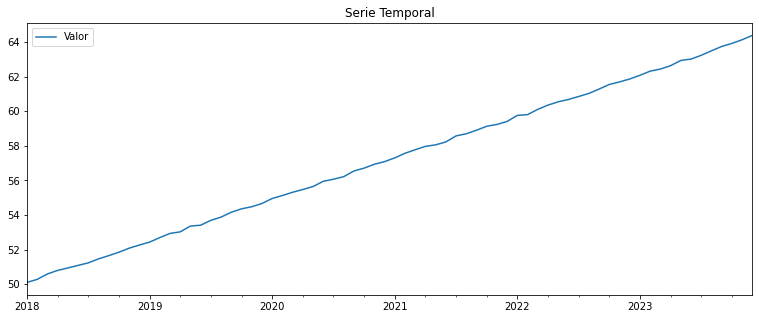

In [39]:
crear_df_fin_tend_det(fecha1,fecha2,'M',columna,[50,0.2],1,0.2)

,Valor
2018-01-31,20.091473
2018-02-28,19.978594
2018-03-31,19.727533
2018-04-30,19.618382
2018-05-31,19.590368
...,...
2024-08-31,8.245791
2024-09-30,8.019688
2024-10-31,7.896473
2024-11-30,7.760607


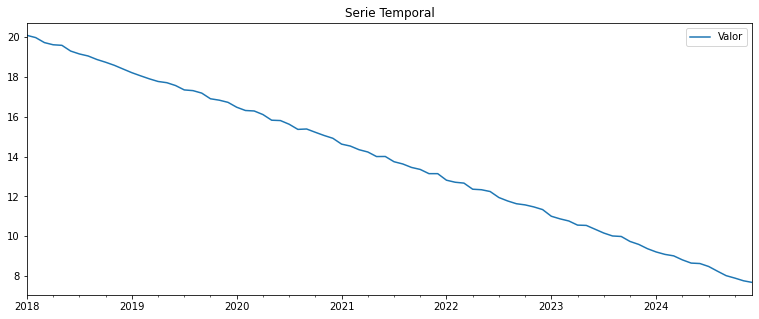

In [40]:
crear_df_periodos_tend_det(fecha1,periodos,'M',columna,[20,-0.15],1,0.2)

CUADRÁTICA (TIPO=2)

,Valor
2018-01-31,50.130831
2018-02-28,49.829095
2018-03-31,49.823822
2018-04-30,49.862459
2018-05-31,49.936068
...,...
2023-08-31,257.886153
2023-09-30,264.291991
2023-10-31,270.884049
2023-11-30,277.588068


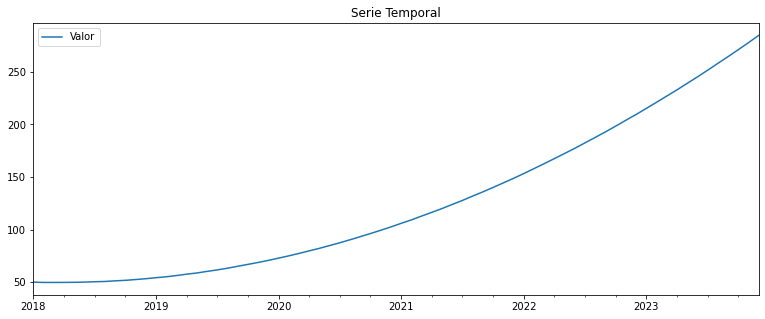

In [41]:
crear_df_fin_tend_det(fecha1,fecha2,'M',columna,[50,-0.25,0.05],2,0.2)

,Valor
2018-01-31,60.043841
2018-02-28,55.165831
2018-03-31,50.556688
2018-04-30,46.170185
2018-05-31,42.116951
...,...
2024-08-31,476.405521
2024-09-30,492.026921
2024-10-31,508.014929
2024-11-30,524.193004


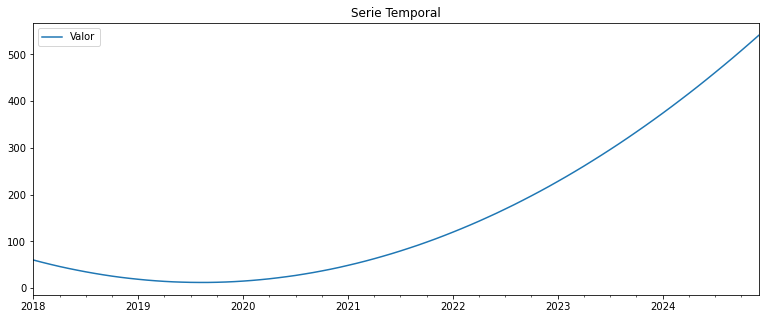

In [42]:
crear_df_periodos_tend_det(fecha1,periodos,'M',columna,[60,-5,0.13],2,0.1)

EXPONENCIAL (TIPO=3)

,Valor
2018-01-31,7.732717e+00
2018-02-28,6.798757e+00
2018-03-31,5.159604e+00
2018-04-30,3.913120e+00
2018-05-31,2.910095e+00
...,...
2023-08-31,4.005957e-07
2023-09-30,3.554315e-07
2023-10-31,2.697709e-07
2023-11-30,1.934346e-07


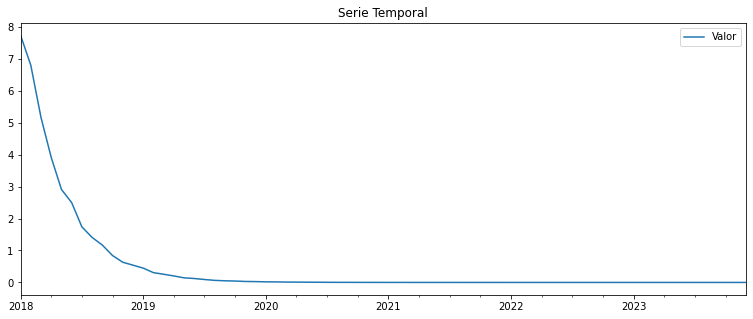

In [43]:
crear_df_fin_tend_det(fecha1,fecha2,'M',columna,[2,-0.25],3,0.2)

,Valor
2018-01-31,8.033317
2018-02-28,8.865647
2018-03-31,9.927221
2018-04-30,10.249538
2018-05-31,12.179328
...,...
2024-08-31,20428.063035
2024-09-30,22386.362394
2024-10-31,25609.349367
2024-11-30,27473.197706


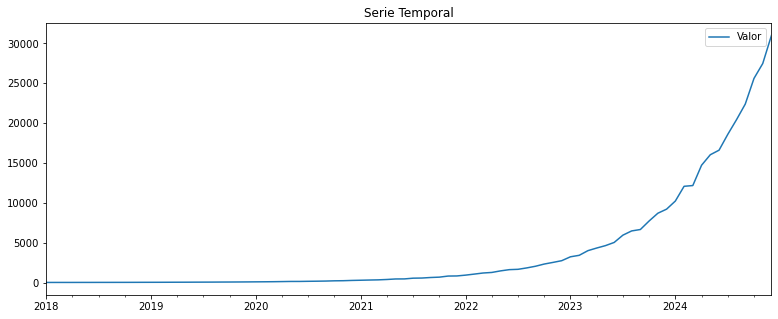

In [44]:
crear_df_periodos_tend_det(fecha1,periodos,'M',columna,[2,0.1],3,0.1)

MODEELOS SEGÚN CIERTAS DISTRIBUCIONES:

,Valor
2018-01-31,74.320734
2018-02-28,80.240971
2018-03-31,80.522545
2018-04-30,82.888801
2018-05-31,75.875984
...,...
2023-08-31,86.474789
2023-09-30,81.363814
2023-10-31,84.390140
2023-11-30,72.852697


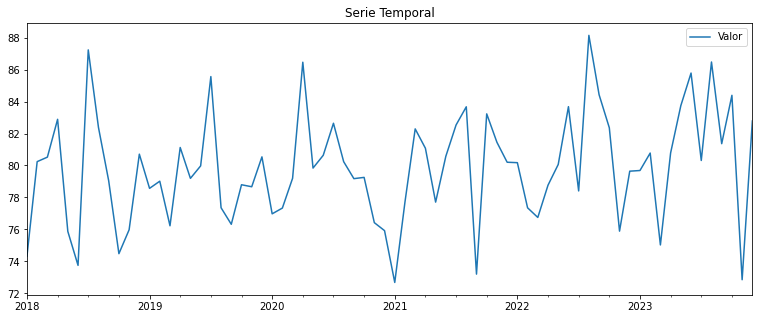

In [45]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,1,[80,4])

,Valor
2018-01-31,50
2018-02-28,50
2018-03-31,50
2018-04-30,50
2018-05-31,52
...,...
2023-08-31,51
2023-09-30,50
2023-10-31,51
2023-11-30,50


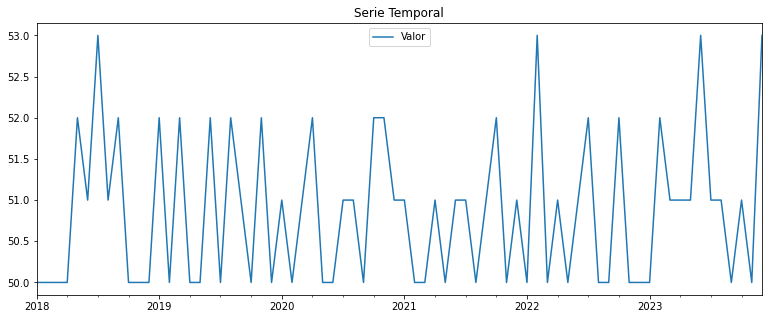

In [46]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,2,[9,0.1,50])

,Valor
2018-01-31,97
2018-02-28,95
2018-03-31,94
2018-04-30,92
2018-05-31,94
...,...
2023-08-31,96
2023-09-30,93
2023-10-31,91
2023-11-30,94


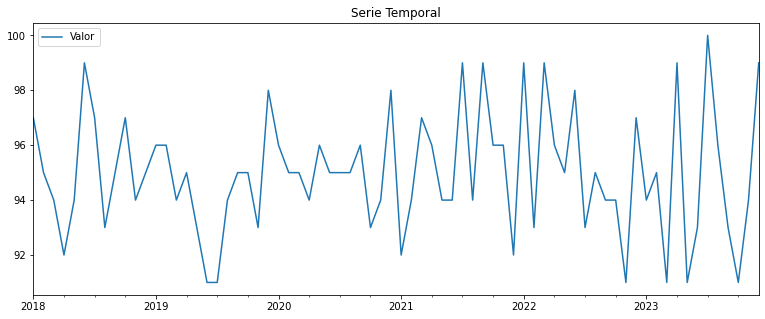

In [47]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,3,[5,90])

,Valor
2018-01-31,77
2018-02-28,76
2018-03-31,78
2018-04-30,81
2018-05-31,79
...,...
2023-08-31,79
2023-09-30,79
2023-10-31,77
2023-11-30,79


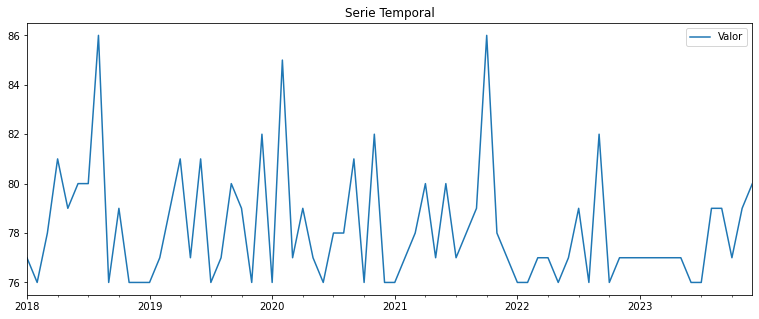

In [48]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,4,[0.3,75])

,Valor
2018-01-31,83
2018-02-28,85
2018-03-31,83
2018-04-30,84
2018-05-31,84
...,...
2023-08-31,84
2023-09-30,87
2023-10-31,83
2023-11-30,86


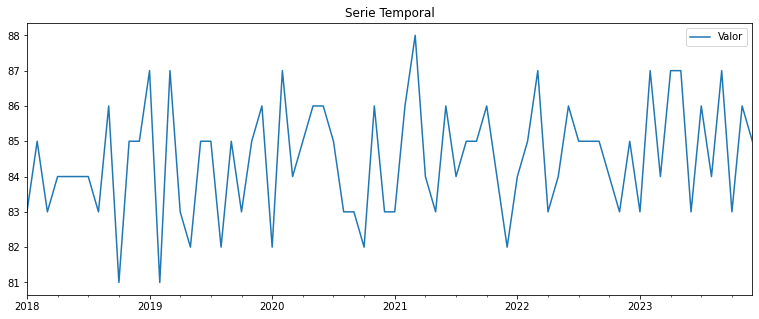

In [49]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,5,[60,17,24,78])

,Valor
2018-01-31,55.0
2018-02-28,55.0
2018-03-31,55.0
2018-04-30,55.0
2018-05-31,55.0
...,...
2023-08-31,55.0
2023-09-30,55.0
2023-10-31,55.0
2023-11-30,55.0


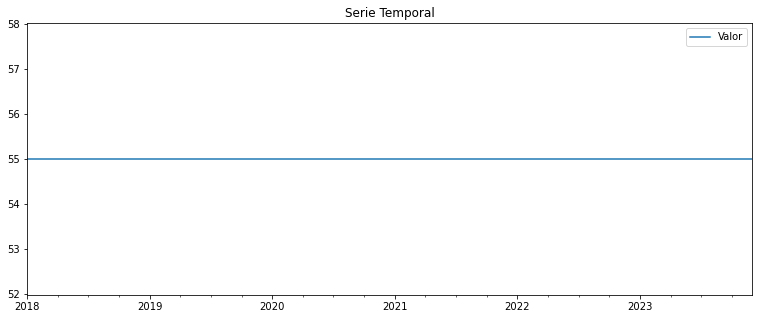

In [50]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,6,[55])

,Valor
2018-01-31,30.669506
2018-02-28,30.976628
2018-03-31,30.710843
2018-04-30,33.297698
2018-05-31,34.032111
...,...
2023-08-31,36.289066
2023-09-30,30.369880
2023-10-31,35.372192
2023-11-30,34.520182


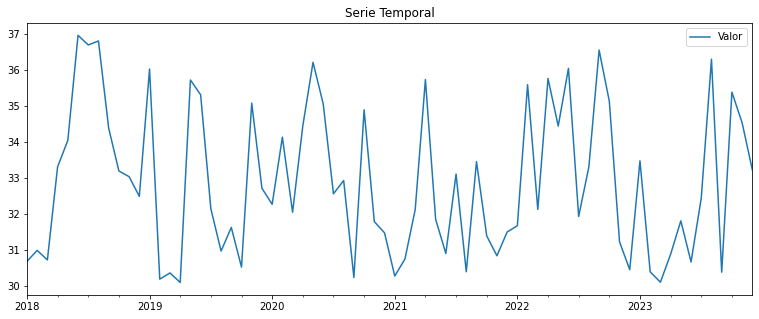

In [51]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,7,[30,7])

,Valor
2018-01-31,84.115753
2018-02-28,81.464987
2018-03-31,108.492965
2018-04-30,80.274187
2018-05-31,80.493200
...,...
2023-08-31,80.444316
2023-09-30,80.912804
2023-10-31,88.757267
2023-11-30,81.361112


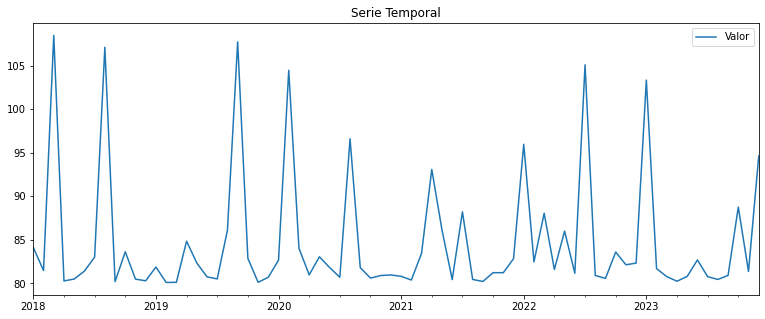

In [52]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,8,[1.5,80,2])

,Valor
2018-01-31,99.231278
2018-02-28,95.316940
2018-03-31,105.158550
2018-04-30,107.114014
2018-05-31,95.628334
...,...
2023-08-31,109.026642
2023-09-30,100.343140
2023-10-31,97.437925
2023-11-30,122.440422


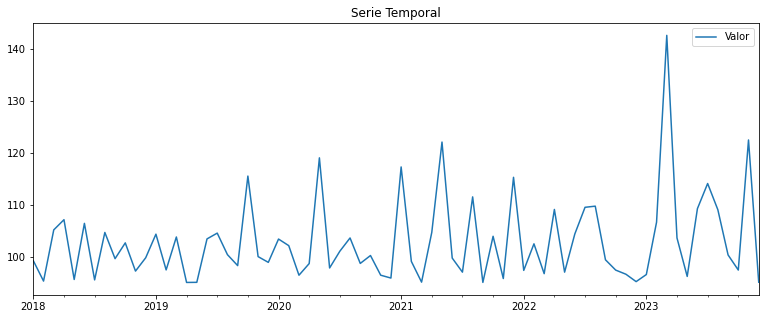

In [53]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,9,[95,7])

,Valor
2018-01-31,39.703135
2018-02-28,33.775508
2018-03-31,38.902890
2018-04-30,38.683942
2018-05-31,35.124641
...,...
2023-08-31,43.514907
2023-09-30,39.102310
2023-10-31,44.287811
2023-11-30,41.917171


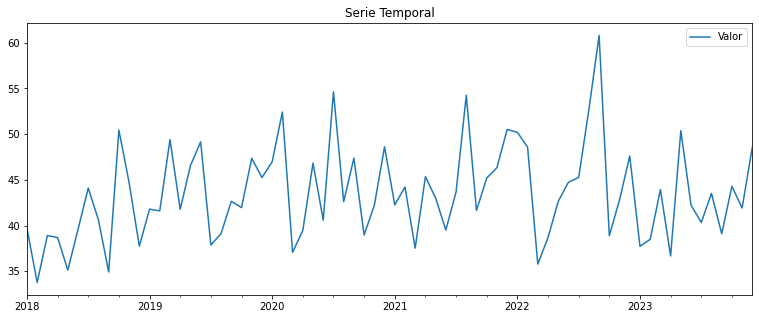

In [54]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,10,[4,32,3])

,Valor
2018-01-31,108.836726
2018-02-28,106.660342
2018-03-31,106.932865
2018-04-30,108.504340
2018-05-31,106.324437
...,...
2023-08-31,106.881256
2023-09-30,108.693223
2023-10-31,108.951578
2023-11-30,109.899197


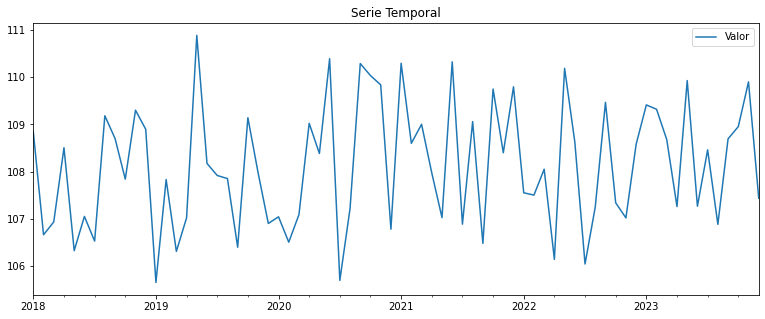

In [55]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,11,[3,5,105,8])

,Valor
2018-01-31,106.942359
2018-02-28,94.354964
2018-03-31,117.999089
2018-04-30,97.676842
2018-05-31,124.118013
...,...
2023-08-31,100.520824
2023-09-30,103.669795
2023-10-31,95.555540
2023-11-30,108.024287


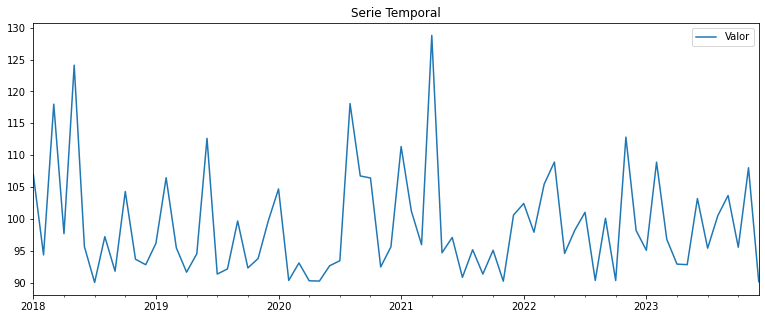

In [56]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,12,[2,90,5])

,Valor
2018-01-31,121.204606
2018-02-28,119.969602
2018-03-31,115.231366
2018-04-30,119.205648
2018-05-31,126.247659
...,...
2023-08-31,121.772430
2023-09-30,118.451764
2023-10-31,125.030778
2023-11-30,113.590048


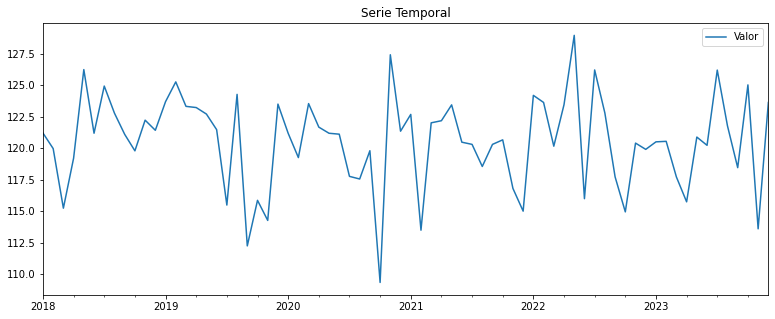

In [57]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,13,[6,120,3])

,Valor
2018-01-31,212.282761
2018-02-28,209.802500
2018-03-31,212.091412
2018-04-30,210.935022
2018-05-31,215.452231
...,...
2023-08-31,214.390644
2023-09-30,212.215998
2023-10-31,213.842365
2023-11-30,212.134150


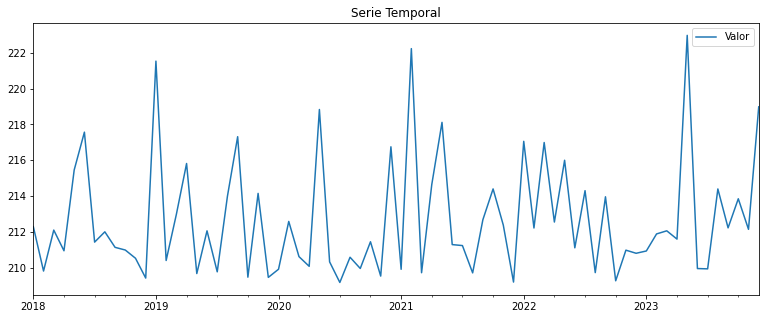

In [58]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,14,[3,200,9])

,Valor
2018-01-31,225.0
2018-02-28,222.0
2018-03-31,219.0
2018-04-30,216.0
2018-05-31,213.0
...,...
2023-08-31,24.0
2023-09-30,21.0
2023-10-31,18.0
2023-11-30,15.0


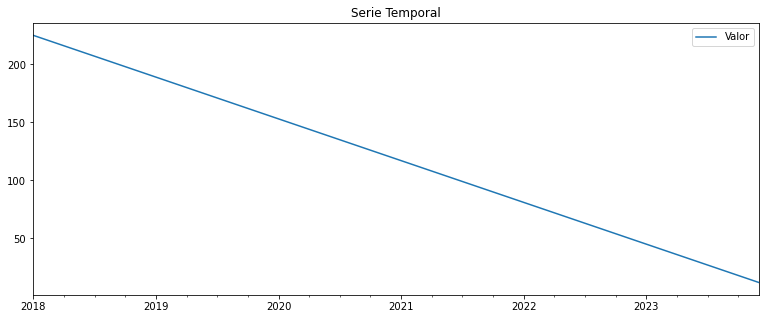

In [59]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,15,[225,3])

,Valor
2018-01-31,60.0
2018-02-28,60.2
2018-03-31,60.4
2018-04-30,60.6
2018-05-31,60.8
...,...
2023-08-31,73.4
2023-09-30,73.6
2023-10-31,73.8
2023-11-30,74.0


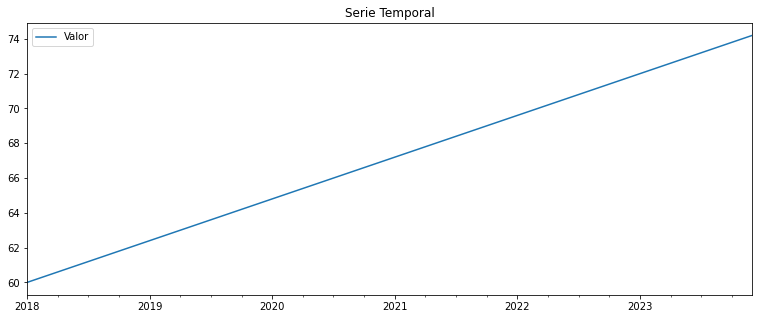

In [60]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,16,[60,0.2])

,Valor
2018-01-31,111.0
2018-02-28,106.0
2018-03-31,110.0
2018-04-30,124.0
2018-05-31,105.0
...,...
2023-08-31,111.0
2023-09-30,111.0
2023-10-31,108.0
2023-11-30,124.0


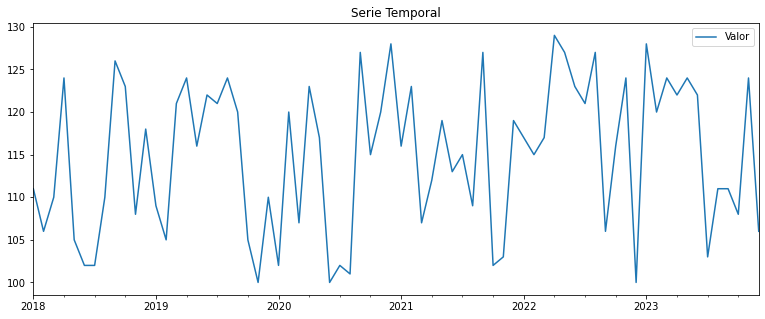

In [61]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,17,[100,130])

,Valor
2018-01-01,82.024699
2018-01-02,82.780178
2018-01-03,81.981561
2018-01-04,83.756736
2018-01-05,72.699363
...,...
2018-03-21,80.124403
2018-03-22,79.069124
2018-03-23,86.944490
2018-03-24,75.426496


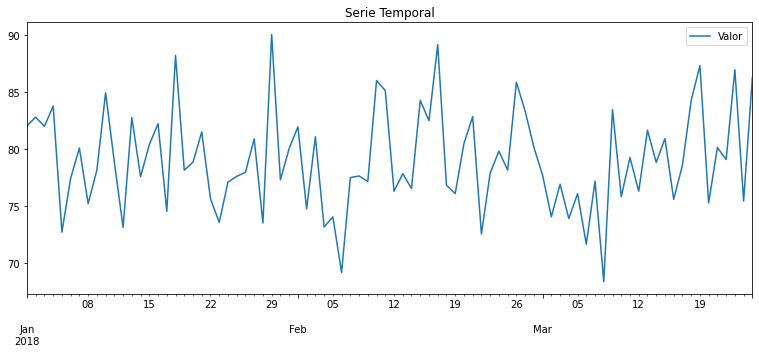

In [62]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,1,[79,5])

,Valor
2018-01-01,100
2018-01-02,94
2018-01-03,99
2018-01-04,100
2018-01-05,97
...,...
2018-03-21,96
2018-03-22,100
2018-03-23,93
2018-03-24,97


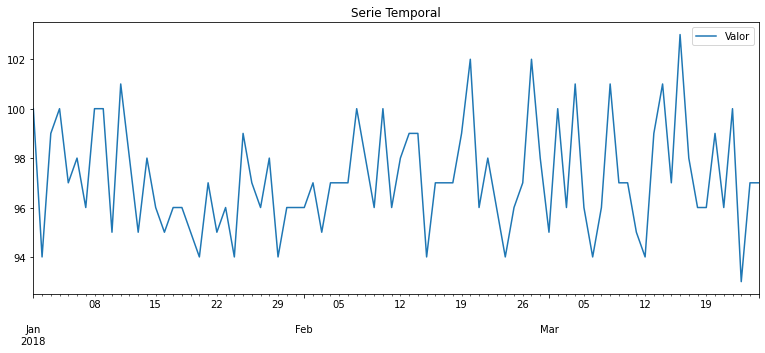

In [63]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,2,[25,0.3,90])

,Valor
2018-01-01,154
2018-01-02,149
2018-01-03,155
2018-01-04,151
2018-01-05,149
...,...
2018-03-21,152
2018-03-22,150
2018-03-23,148
2018-03-24,147


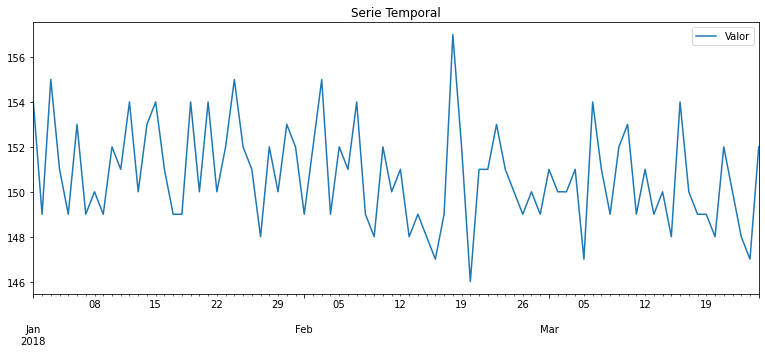

In [64]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,3,[6,145])

,Valor
2018-01-01,195
2018-01-02,190
2018-01-03,192
2018-01-04,190
2018-01-05,193
...,...
2018-03-21,194
2018-03-22,189
2018-03-23,195
2018-03-24,195


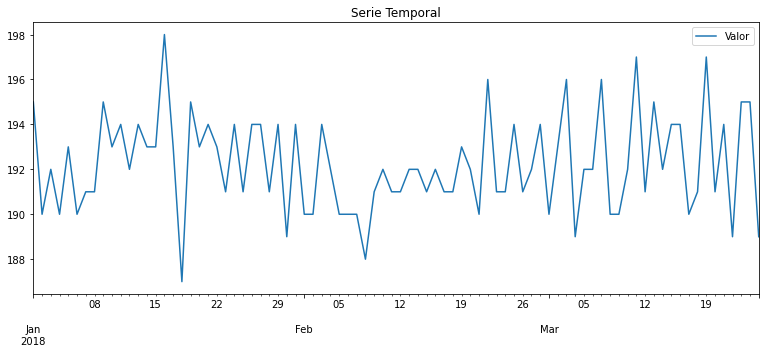

In [65]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,5,[80,33,30,180])

,Valor
2018-01-01,780.0
2018-01-02,780.0
2018-01-03,780.0
2018-01-04,780.0
2018-01-05,780.0
...,...
2018-03-21,780.0
2018-03-22,780.0
2018-03-23,780.0
2018-03-24,780.0


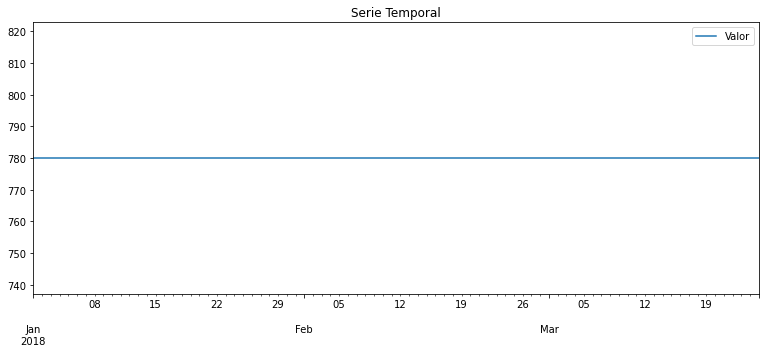

In [66]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,6,[780])

,Valor
2018-01-01,87.209318
2018-01-02,87.748410
2018-01-03,87.429730
2018-01-04,87.232925
2018-01-05,87.184638
...,...
2018-03-21,87.584694
2018-03-22,87.152339
2018-03-23,87.487861
2018-03-24,87.445023


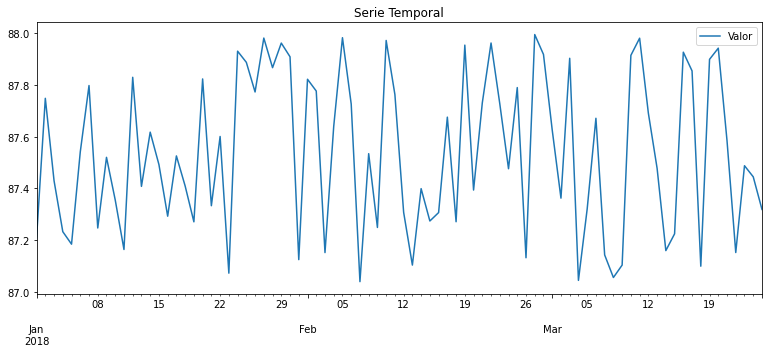

In [67]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,7,[87])

,Valor
2018-01-01,90.004910
2018-01-02,92.119803
2018-01-03,101.097195
2018-01-04,90.220746
2018-01-05,94.747681
...,...
2018-03-21,121.872096
2018-03-22,115.322367
2018-03-23,90.180958
2018-03-24,2207.613730


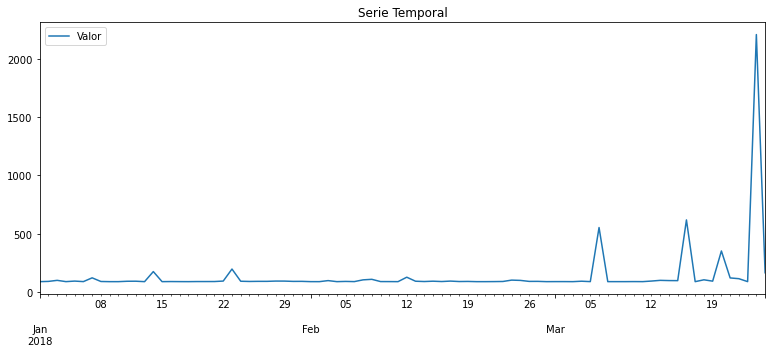

In [68]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,8,[3,90])

,Valor
2018-01-01,170.795776
2018-01-02,170.970419
2018-01-03,170.649664
2018-01-04,172.931490
2018-01-05,171.917295
...,...
2018-03-21,171.515677
2018-03-22,171.205502
2018-03-23,172.434960
2018-03-24,170.515146


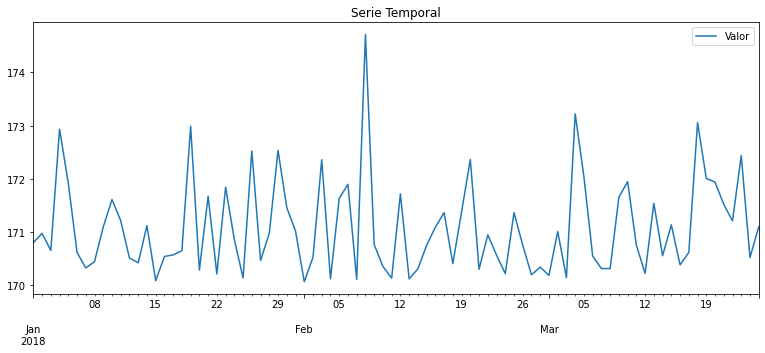

In [69]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,9,[170])

,Valor
2018-01-01,121.940631
2018-01-02,125.544693
2018-01-03,125.356040
2018-01-04,124.763892
2018-01-05,124.581352
...,...
2018-03-21,124.947442
2018-03-22,124.986157
2018-03-23,123.060835
2018-03-24,123.267900


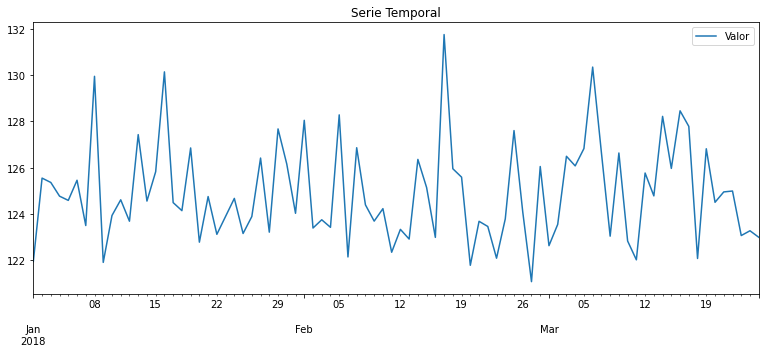

In [70]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,10,[5,120])

,Valor
2018-01-01,139.040492
2018-01-02,139.512621
2018-01-03,138.105889
2018-01-04,138.474094
2018-01-05,138.319645
...,...
2018-03-21,139.330574
2018-03-22,136.393567
2018-03-23,139.916366
2018-03-24,136.518897


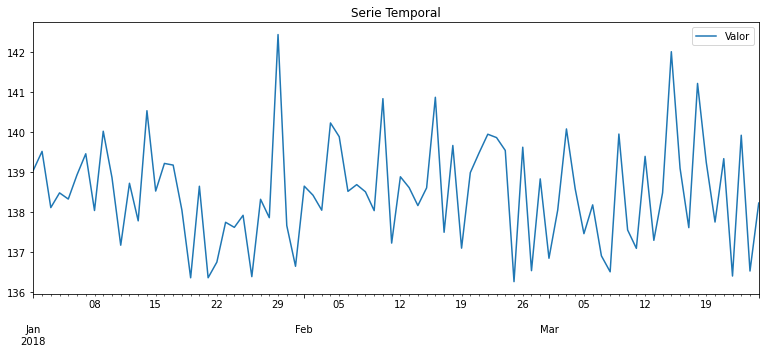

In [71]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,11,[4,8,135,10])

,Valor
2018-01-01,202.859986
2018-01-02,199.251986
2018-01-03,198.560402
2018-01-04,198.304611
2018-01-05,198.491380
...,...
2018-03-21,198.125031
2018-03-22,198.467138
2018-03-23,204.939178
2018-03-24,200.600867


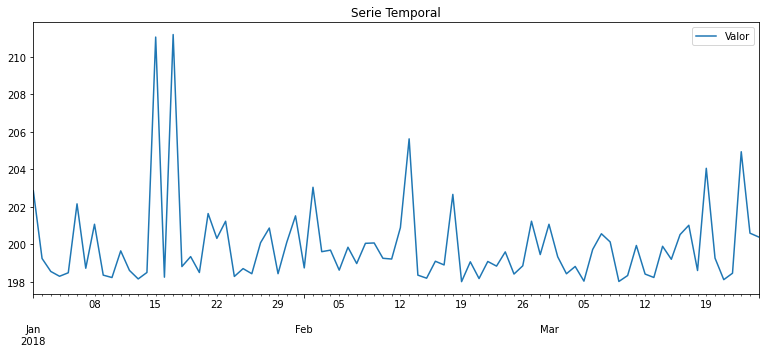

In [72]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,12,[2,198])

,Valor
2018-01-01,181.447466
2018-01-02,181.608578
2018-01-03,181.941143
2018-01-04,182.214241
2018-01-05,182.103131
...,...
2018-03-21,181.501119
2018-03-22,183.717824
2018-03-23,182.030371
2018-03-24,182.166301


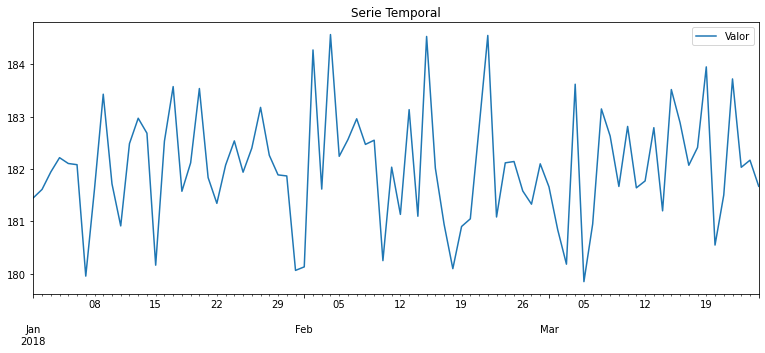

In [73]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,13,[9,182])

,Valor
2018-01-01,112.872601
2018-01-02,113.207044
2018-01-03,111.611846
2018-01-04,111.164786
2018-01-05,133.303582
...,...
2018-03-21,111.152294
2018-03-22,113.100757
2018-03-23,111.063672
2018-03-24,111.067788


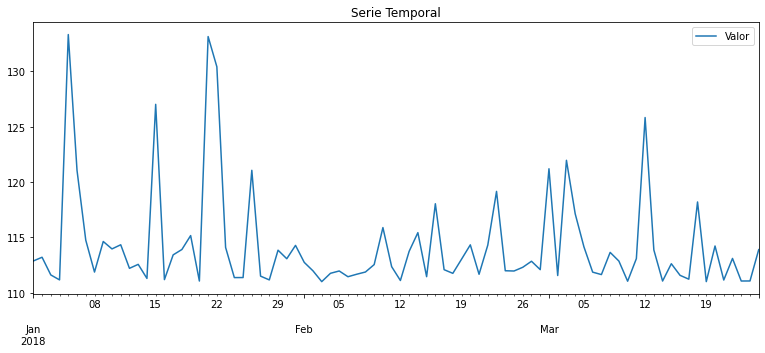

In [74]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,14,[6,96,15])

,Valor
2018-01-01,200.0
2018-01-02,199.4
2018-01-03,198.8
2018-01-04,198.2
2018-01-05,197.6
...,...
2018-03-21,152.6
2018-03-22,152.0
2018-03-23,151.4
2018-03-24,150.8


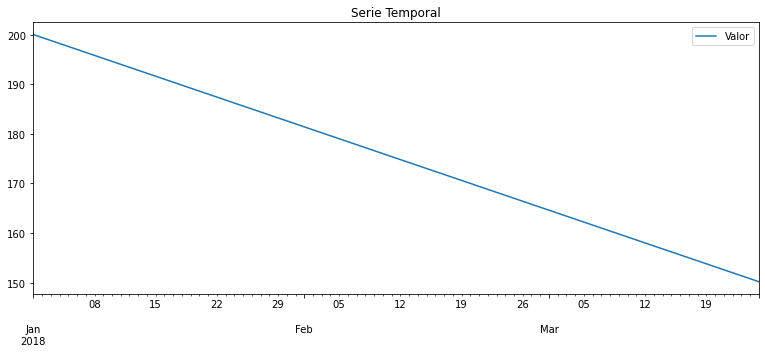

In [75]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,15,[200,0.6])

,Valor
2018-01-01,125.0
2018-01-02,125.7
2018-01-03,126.4
2018-01-04,127.1
2018-01-05,127.8
...,...
2018-03-21,180.3
2018-03-22,181.0
2018-03-23,181.7
2018-03-24,182.4


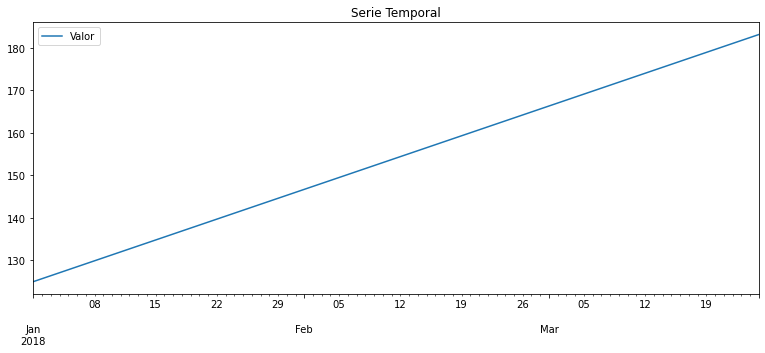

In [76]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,16,[125,0.7])

,Valor
2018-01-01,196.0
2018-01-02,138.0
2018-01-03,182.0
2018-01-04,190.0
2018-01-05,190.0
...,...
2018-03-21,191.0
2018-03-22,169.0
2018-03-23,128.0
2018-03-24,133.0


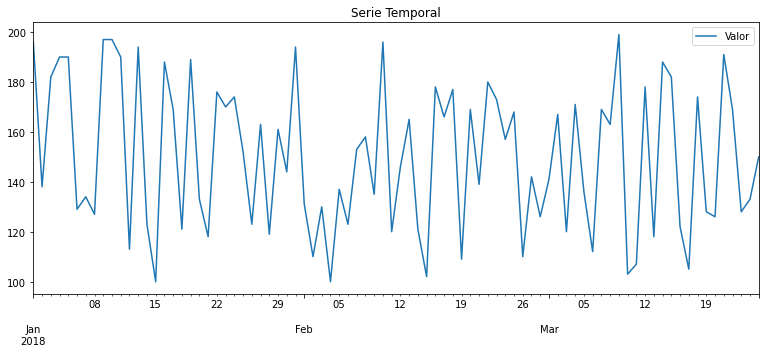

In [77]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,17,[100,200])

MODELOS PERIÓDICOS 

In [78]:
distr_per=1

In [79]:
params_per=[650,25]

,Valor
2018-01-31,627.194015
2018-02-28,658.504863
2018-03-31,682.298213
2018-04-30,689.429585
2018-05-31,606.706019
...,...
2023-08-31,659.648481
2023-09-30,698.354122
2023-10-31,658.204592
2023-11-30,685.430939


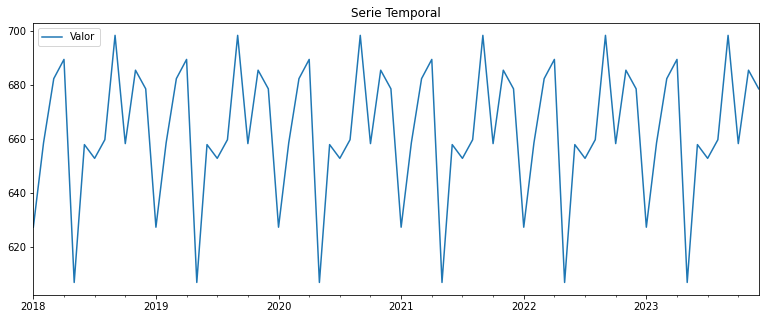

In [80]:
crear_df_fin_periodicos(fecha1,fecha2,'M',columna,distr_per,params_per,12,1)

,Valor
2018-01-31,678.030458
2018-02-28,677.813165
2018-03-31,636.147789
2018-04-30,641.637642
2018-05-31,693.508356
...,...
2023-08-31,660.078257
2023-09-30,685.554320
2023-10-31,699.845994
2023-11-30,633.570535


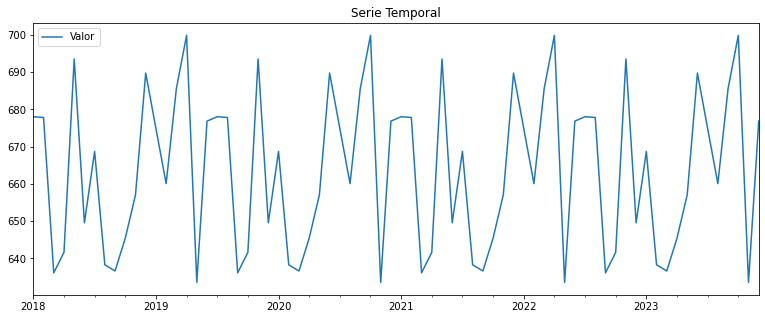

In [81]:
crear_df_fin_periodicos(fecha1,fecha2,'M',columna,distr_per,params_per,4,2)

,Valor
2018-01-31,663.183646
2018-02-28,648.625850
2018-03-31,657.984585
2018-04-30,624.448053
2018-05-31,657.083558
...,...
2024-08-31,636.583130
2024-09-30,673.058581
2024-10-31,648.457607
2024-11-30,677.187123


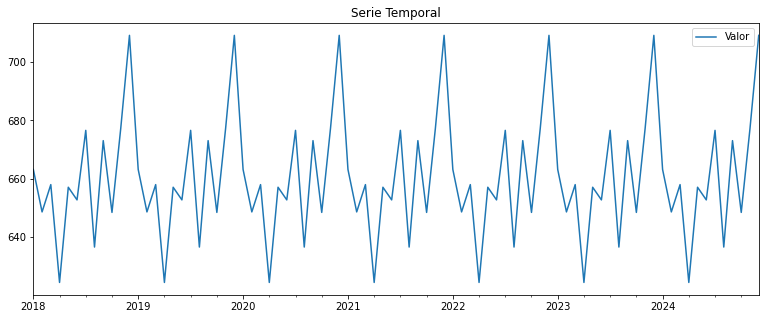

In [82]:
crear_df_periodos_periodicos(fecha1,periodos,'M',columna,distr_per,params_per,12,1)

,Valor
2018-01-31,608.145440
2018-02-28,589.389878
2018-03-31,624.823324
2018-04-30,643.293597
2018-05-31,640.285335
...,...
2024-08-31,678.907105
2024-09-30,654.580520
2024-10-31,605.806700
2024-11-30,685.805795


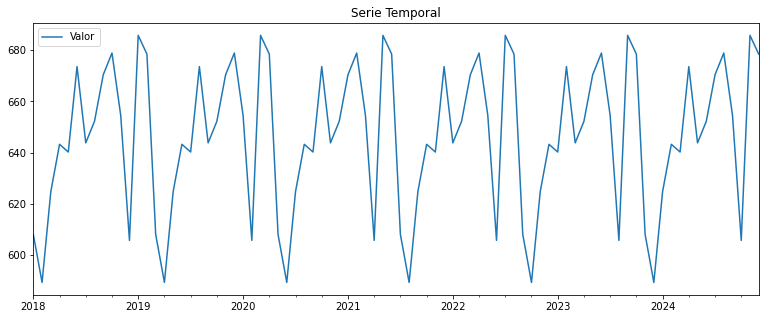

In [83]:
crear_df_periodos_periodicos(fecha1,periodos,'M',columna,distr_per,params_per,6,2)

MODELOS ARMA (AUTORREGRESIVOS Y DE MEDIAS MÓVILES)

In [84]:
c = 125

In [85]:
distr_ARMA = 1

In [86]:
params_ARMA = [300,20]

In [87]:
s = 4

In [88]:
phi = [0.3,0.2,0.1]

In [89]:
teta = [0.2,0.5]

In [90]:
a = []

,Valor
2018-01-31,298.229700
2018-02-28,304.374734
2018-03-31,327.071733
2018-04-30,311.805119
2018-05-31,297.788599
...,...
2023-08-31,1624.384867
2023-09-30,1580.143428
2023-10-31,1588.171152
2023-11-30,1555.610115


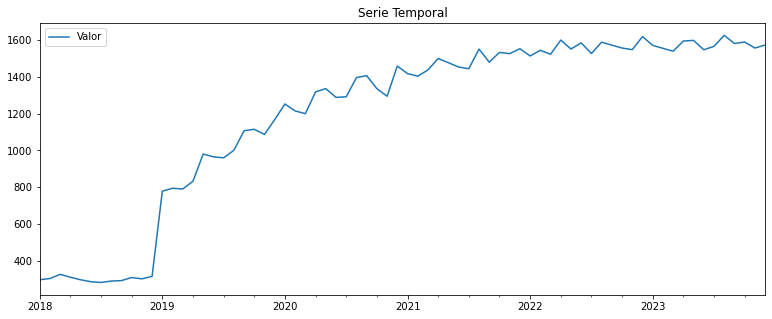

In [91]:
crear_df_fin_ARMA(fecha1,fecha2,'M',columna,c,distr_ARMA,params_ARMA,s,phi,teta,a)

,Valor
2018-01-31,292.956862
2018-02-28,272.946977
2018-03-31,317.781450
2018-04-30,304.192126
2018-05-31,301.252134
...,...
2023-08-31,1036.693384
2023-09-30,1043.639501
2023-10-31,1054.569270
2023-11-30,1070.270366


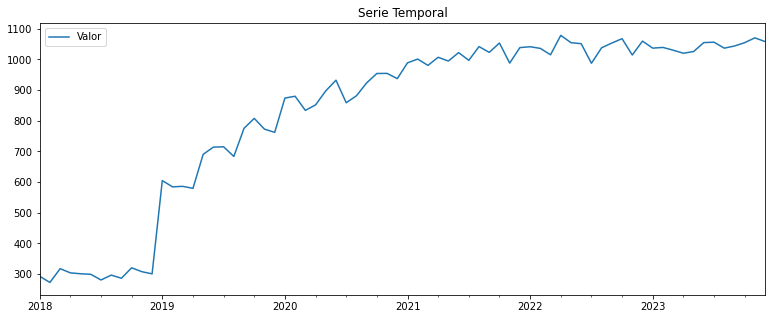

In [92]:
crear_df_fin_ARMA(fecha1,fecha2,'M',columna,c,distr_ARMA,params_ARMA,s,phi,[],a)

,Valor
2018-01-31,314.059068
2018-02-28,308.178758
2018-03-31,328.260085
2018-04-30,302.783219
2018-05-31,292.098989
...,...
2023-08-31,625.800444
2023-09-30,644.943569
2023-10-31,621.698815
2023-11-30,625.905793


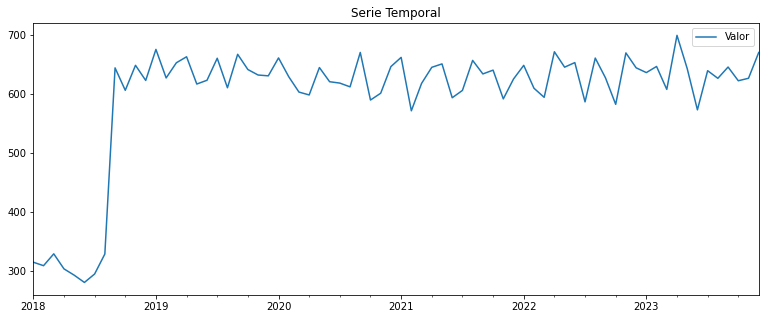

In [93]:
crear_df_fin_ARMA(fecha1,fecha2,'M',columna,c,distr_ARMA,params_ARMA,s,[],teta,a)

,Valor
2018-01-31,323.131714
2018-02-28,306.231328
2018-03-31,290.459681
2018-04-30,823.061192
2018-05-31,978.810963
...,...
2023-08-31,1638.316862
2023-09-30,1626.554112
2023-10-31,1627.450840
2023-11-30,1601.041978


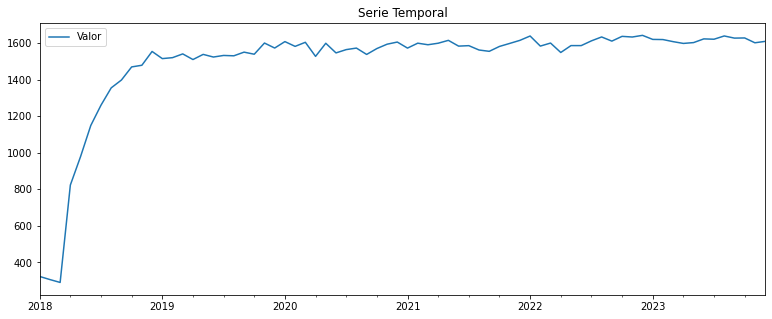

In [94]:
crear_df_fin_ARMA(fecha1,fecha2,'M',columna,c,distr_ARMA,params_ARMA,0,phi,teta,a)

,Valor
2018-01-31,294.192484
2018-02-28,334.866897
2018-03-31,656.354078
2018-04-30,663.652067
2018-05-31,648.626833
...,...
2023-08-31,652.027191
2023-09-30,639.342538
2023-10-31,656.058804
2023-11-30,627.574534


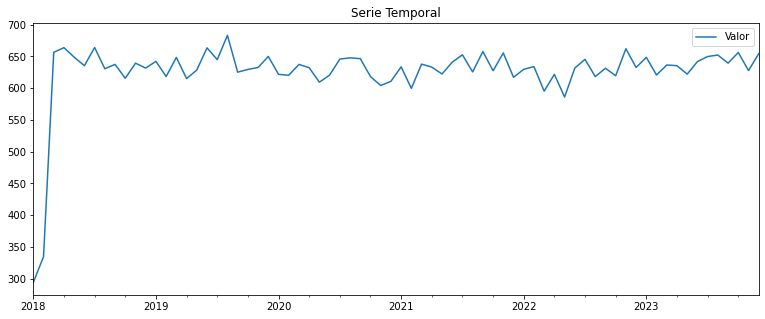

In [95]:
crear_df_fin_ARMA(fecha1,fecha2,'M',columna,c,distr_ARMA,params_ARMA,0,[],teta,a)

,Valor
2018-01-31,320.201906
2018-02-28,297.127251
2018-03-31,318.312489
2018-04-30,624.215087
2018-05-31,718.603085
...,...
2023-08-31,1080.203355
2023-09-30,1083.166981
2023-10-31,1109.300677
2023-11-30,1098.916861


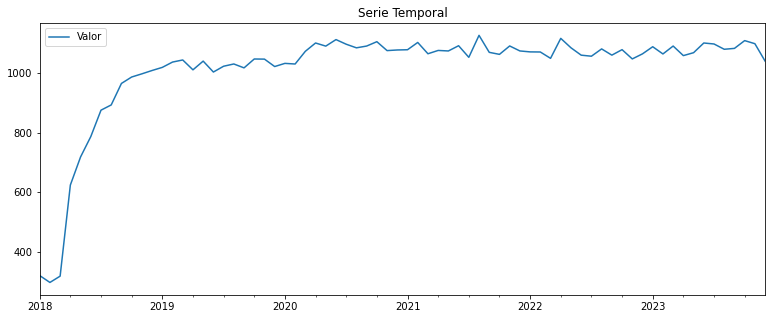

In [96]:
crear_df_fin_ARMA(fecha1,fecha2,'M',columna,c,distr_ARMA,params_ARMA,0,phi,[],a)

,Valor
2018-01-01,324.066552
2018-01-02,289.121561
2018-01-03,302.175067
2018-01-04,327.333828
2018-01-05,295.142128
...,...
2018-03-21,1583.343055
2018-03-22,1614.180806
2018-03-23,1546.661039
2018-03-24,1575.392720


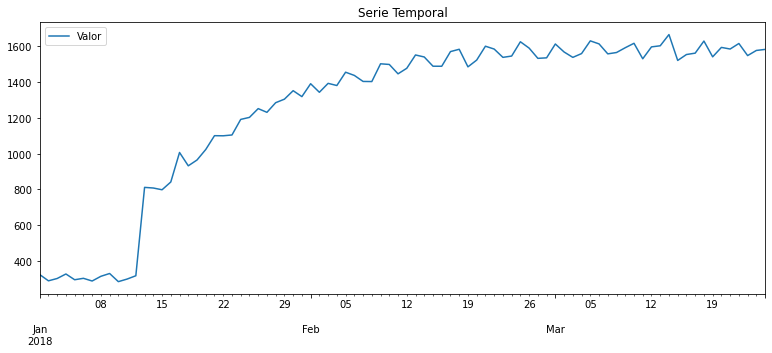

In [97]:
crear_df_periodos_ARMA(fecha1,periodos,'D',columna,c,distr_ARMA,params_ARMA,s,phi,teta,a)

,Valor
2018-01-01,307.577990
2018-01-02,284.725151
2018-01-03,330.656255
2018-01-04,288.560527
2018-01-05,334.269851
...,...
2018-03-21,1077.652912
2018-03-22,1075.430648
2018-03-23,1048.312543
2018-03-24,1076.762332


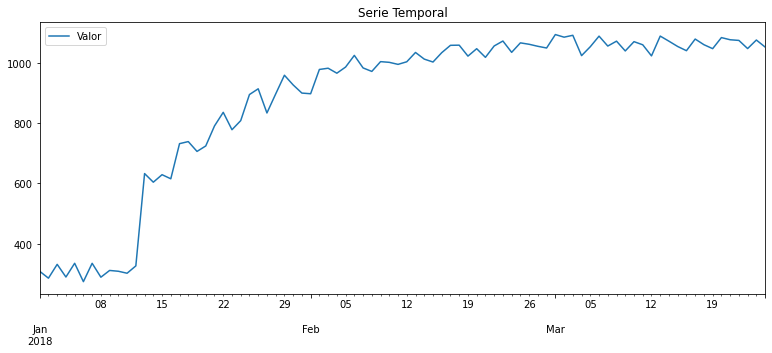

In [98]:
crear_df_periodos_ARMA(fecha1,periodos,'D',columna,c,distr_ARMA,params_ARMA,s,phi,[],a)

,Valor
2018-01-01,297.132024
2018-01-02,313.313105
2018-01-03,321.262956
2018-01-04,306.425602
2018-01-05,288.036785
...,...
2018-03-21,565.533732
2018-03-22,645.930474
2018-03-23,633.151180
2018-03-24,655.342227


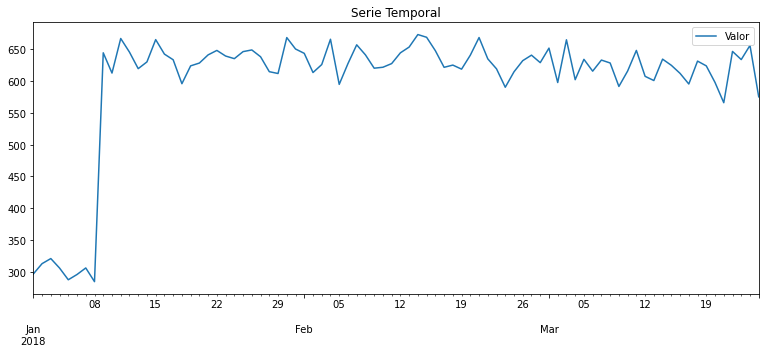

In [99]:
crear_df_periodos_ARMA(fecha1,periodos,'D',columna,c,distr_ARMA,params_ARMA,s,[],teta,a)

,Valor
2018-01-01,275.895883
2018-01-02,313.851558
2018-01-03,291.861557
2018-01-04,849.807950
2018-01-05,975.571013
...,...
2018-03-21,1639.667540
2018-03-22,1641.674618
2018-03-23,1626.809474
2018-03-24,1606.468600


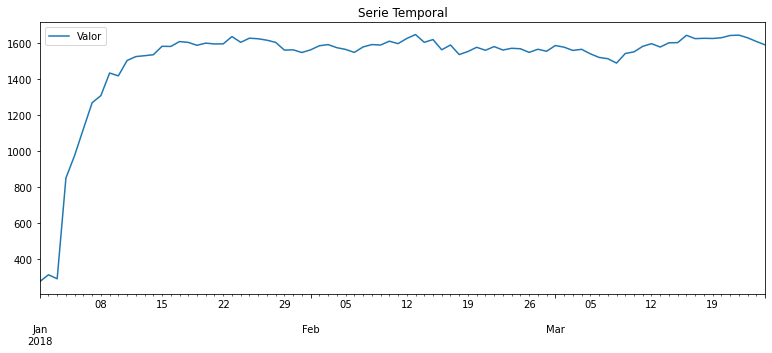

In [100]:
crear_df_periodos_ARMA(fecha1,periodos,'D',columna,c,distr_ARMA,params_ARMA,0,phi,teta,a)

,Valor
2018-01-01,273.560990
2018-01-02,330.381522
2018-01-03,656.225062
2018-01-04,670.613354
2018-01-05,649.126509
...,...
2018-03-21,610.062212
2018-03-22,641.297423
2018-03-23,618.188899
2018-03-24,630.538636


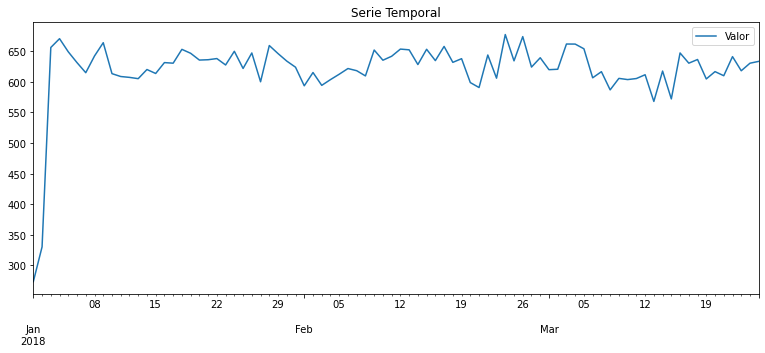

In [101]:
crear_df_periodos_ARMA(fecha1,periodos,'D',columna,c,distr_ARMA,params_ARMA,0,[],teta,a)

,Valor
2018-01-01,296.740291
2018-01-02,302.368773
2018-01-03,282.108231
2018-01-04,612.029852
2018-01-05,690.186729
...,...
2018-03-21,1099.763865
2018-03-22,1099.764350
2018-03-23,1111.982742
2018-03-24,1070.023648


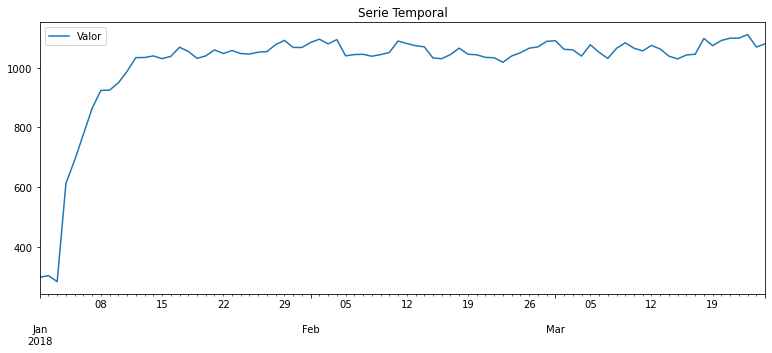

In [102]:
crear_df_periodos_ARMA(fecha1,periodos,'D',columna,c,distr_ARMA,params_ARMA,0,phi,[],a)

MODELOS CON DRIFT

In [103]:
paramsD1=[1,[350,23]]
paramsD2=[2,[20,0.6,200]]

In [104]:
params_ARMA1 = [250,1,[300,15],3, [0.2,0.4],[0.3],[]]
params_ARMA2 = [270,1,[330,15],0, [0.8],[0.3,0.25],[]]

In [105]:
params_per1= [1,1,[200,14],4]
params_per2= [2,1,[250,21],4]

In [106]:
params_tend1 = [[200,0.3],1,0.3]
params_tend2 = [[150,-4,0.2],2,0.15]

,Valor
2018-01-31,314.115865
2018-02-28,343.838572
2018-03-31,367.924397
2018-04-30,408.203845
2018-05-31,310.045273
...,...
2023-08-31,210.000000
2023-09-30,209.000000
2023-10-31,212.000000
2023-11-30,210.000000


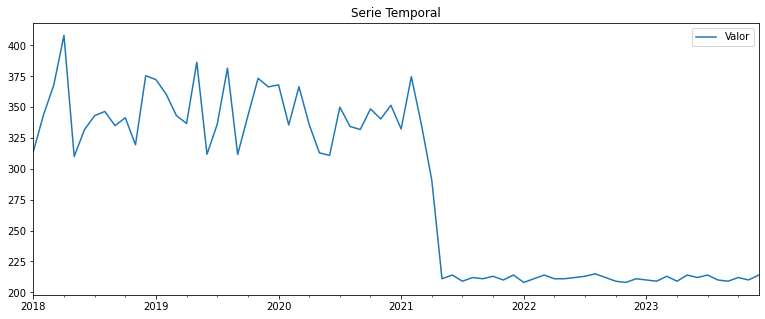

In [107]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,paramsD1,paramsD2,1,40)

,Valor
2018-01-31,343.323382
2018-02-28,332.453690
2018-03-31,337.907079
2018-04-30,341.335678
2018-05-31,346.483148
...,...
2023-08-31,1492.254291
2023-09-30,1481.482984
2023-10-31,1480.511820
2023-11-30,1509.007363


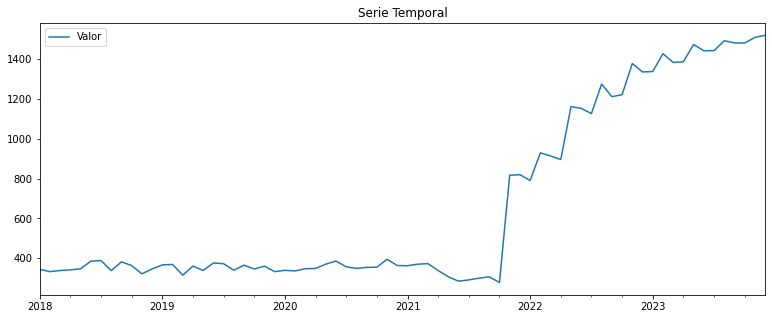

In [108]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,paramsD1,params_ARMA1,2,40)

,Valor
2018-01-31,212.000000
2018-02-28,214.000000
2018-03-31,209.000000
2018-04-30,213.000000
2018-05-31,215.000000
...,...
2023-08-31,166.747899
2023-09-30,193.197294
2023-10-31,168.446700
2023-11-30,194.113307


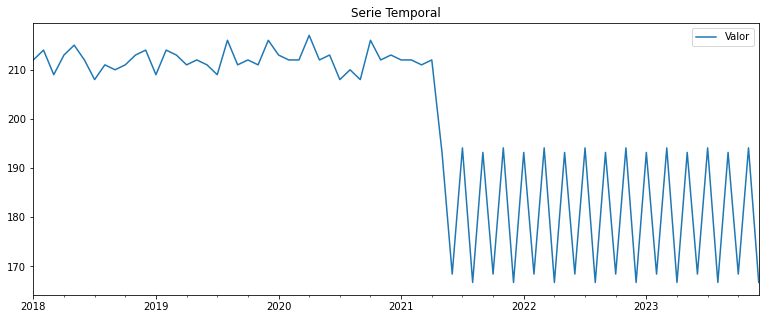

In [109]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,paramsD2,params_per1,3,40)

,Valor
2018-01-31,356.166011
2018-02-28,362.549833
2018-03-31,320.163126
2018-04-30,354.965121
2018-05-31,299.948188
...,...
2023-08-31,187.918839
2023-09-30,194.859280
2023-10-31,202.261956
2023-11-30,210.023218


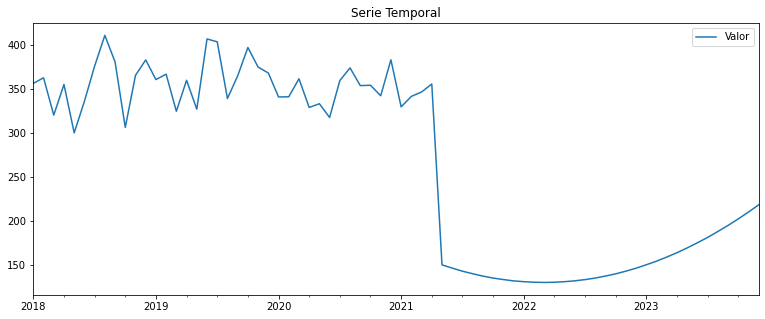

In [110]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,paramsD1,params_tend2,4,40)

,Valor
2018-01-31,297.187929
2018-02-28,287.514242
2018-03-31,304.647013
2018-04-30,302.209894
2018-05-31,303.405109
...,...
2023-08-31,3897.003425
2023-09-30,3890.206117
2023-10-31,3904.126693
2023-11-30,3900.988984


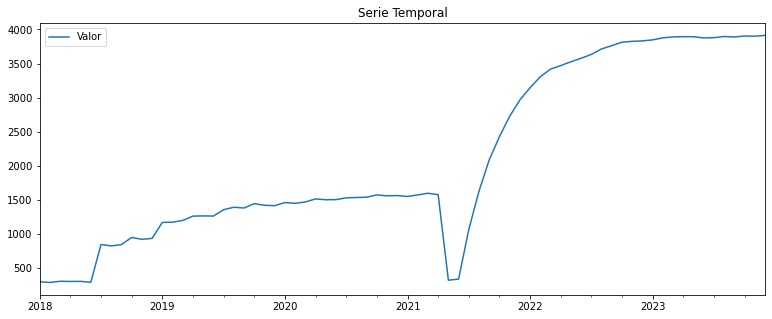

In [111]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_ARMA1,params_ARMA2,5,40)

,Valor
2018-01-31,290.173035
2018-02-28,288.673982
2018-03-31,291.519449
2018-04-30,287.172367
2018-05-31,291.192362
...,...
2023-08-31,211.000000
2023-09-30,212.000000
2023-10-31,212.000000
2023-11-30,215.000000


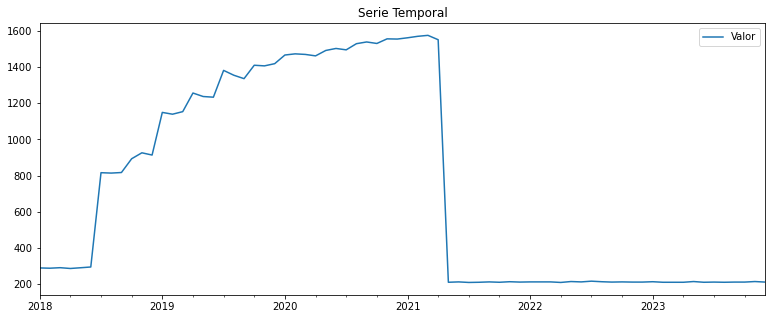

In [112]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_ARMA1,paramsD2,6,40)

,Valor
2018-01-31,323.667682
2018-02-28,332.310296
2018-03-31,1040.263261
2018-04-30,1613.043454
2018-05-31,2051.026153
...,...
2023-08-31,219.501990
2023-09-30,282.482460
2023-10-31,268.093767
2023-11-30,203.670490


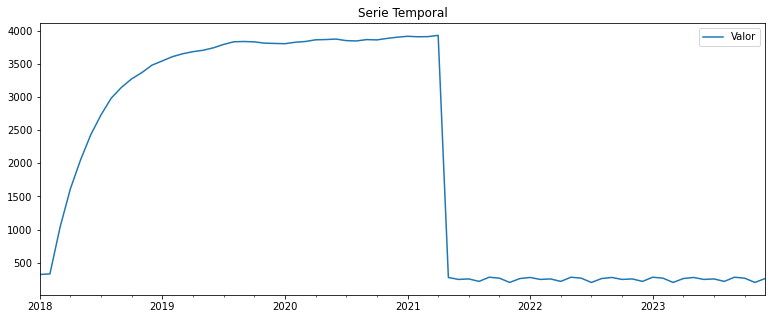

In [113]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_ARMA2,params_per2,7,40)

,Valor
2018-01-31,267.021848
2018-02-28,338.172357
2018-03-31,299.794797
2018-04-30,315.213633
2018-05-31,305.460100
...,...
2023-08-31,208.160670
2023-09-30,208.588956
2023-10-31,208.946185
2023-11-30,209.052121


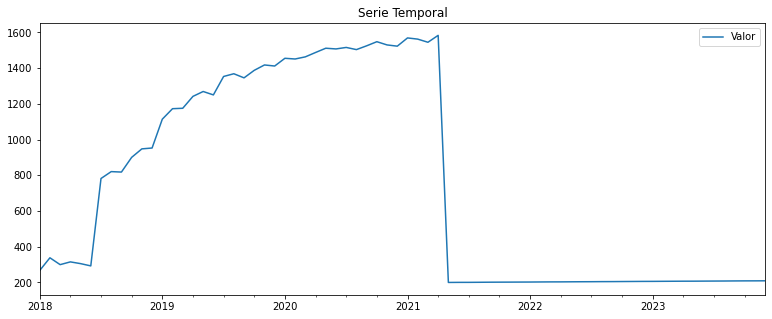

In [114]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_ARMA1,params_tend1,8,40)

,Valor
2018-01-31,187.876567
2018-02-28,203.432980
2018-03-31,226.137296
2018-04-30,190.569714
2018-05-31,187.876567
...,...
2023-08-31,248.286543
2023-09-30,252.788215
2023-10-31,236.785959
2023-11-30,254.058697


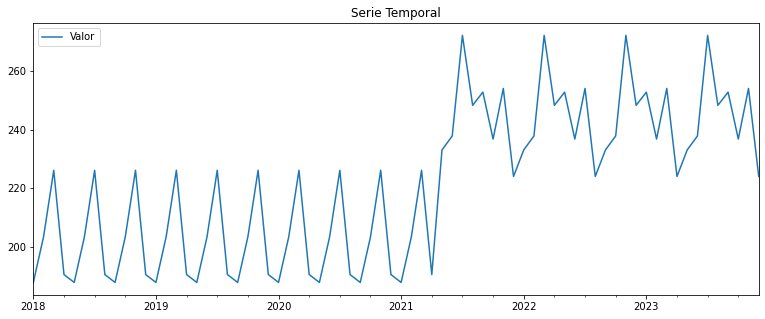

In [115]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_per1,params_per2,9,40)

,Valor
2018-01-31,211.791296
2018-02-28,191.065345
2018-03-31,206.952897
2018-04-30,206.841709
2018-05-31,211.791296
...,...
2023-08-31,317.380700
2023-09-30,342.257770
2023-10-31,349.275165
2023-11-30,365.169955


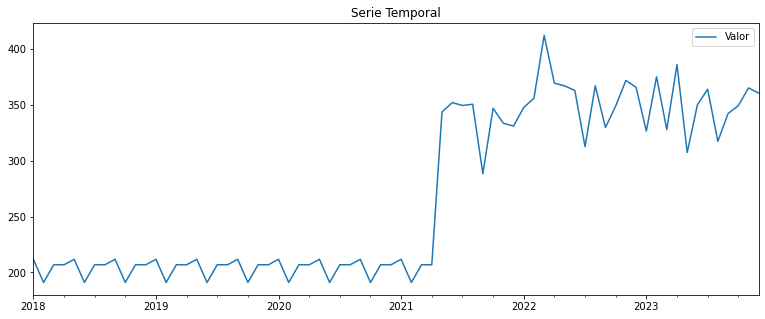

In [116]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_per1,paramsD1,10,40)

,Valor
2018-01-31,296.078223
2018-02-28,260.883238
2018-03-31,270.940809
2018-04-30,214.698918
2018-05-31,316.944758
...,...
2023-08-31,3907.201969
2023-09-30,3900.168026
2023-10-31,3904.053101
2023-11-30,3916.373984


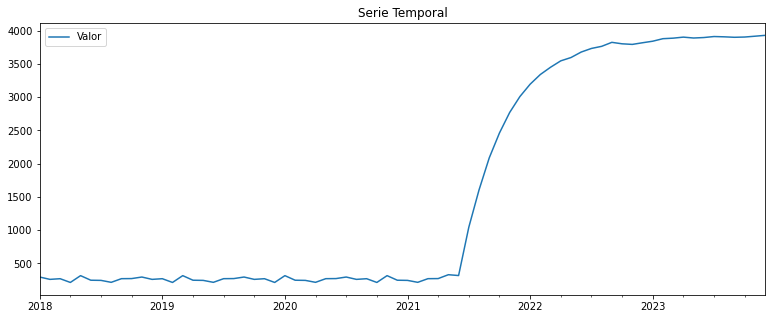

In [117]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_per2,params_ARMA2,11,40)

,Valor
2018-01-31,254.228040
2018-02-28,291.210908
2018-03-31,240.932840
2018-04-30,246.470104
2018-05-31,275.998827
...,...
2023-08-31,208.366466
2023-09-30,208.588576
2023-10-31,208.813342
2023-11-30,209.131071


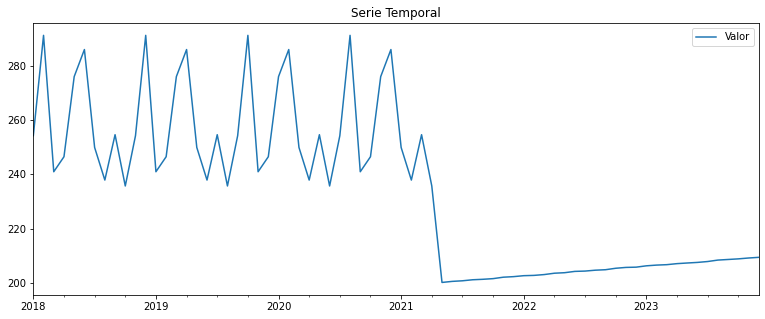

In [118]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_per2,params_tend1,12,40)

,Valor
2018-01-31,200.119923
2018-02-28,200.345659
2018-03-31,200.846884
2018-04-30,200.966557
2018-05-31,201.445340
...,...
2023-08-31,187.895244
2023-09-30,194.847063
2023-10-31,202.335831
2023-11-30,210.149187


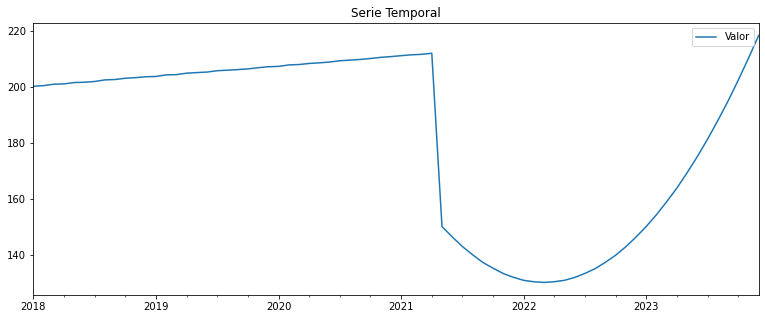

In [119]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_tend1,params_tend2,13,40)

,Valor
2018-01-31,200.171612
2018-02-28,200.554544
2018-03-31,200.711736
2018-04-30,201.148220
2018-05-31,201.358274
...,...
2023-08-31,209.000000
2023-09-30,214.000000
2023-10-31,212.000000
2023-11-30,211.000000


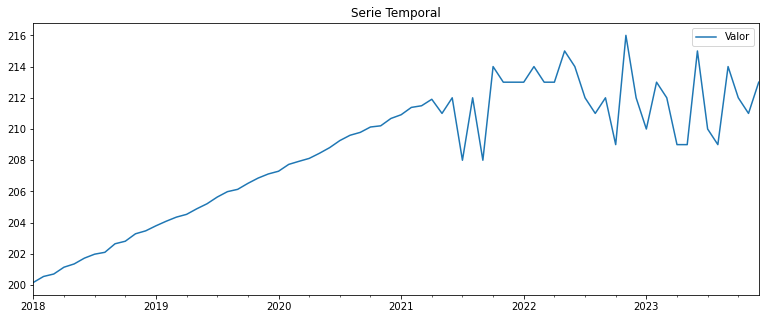

In [120]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_tend1,paramsD2,14,40)

,Valor
2018-01-31,150.055818
2018-02-28,146.314712
2018-03-31,142.919905
2018-04-30,139.923099
2018-05-31,137.200005
...,...
2023-08-31,1492.375988
2023-09-30,1535.984994
2023-10-31,1473.234840
2023-11-30,1535.624976


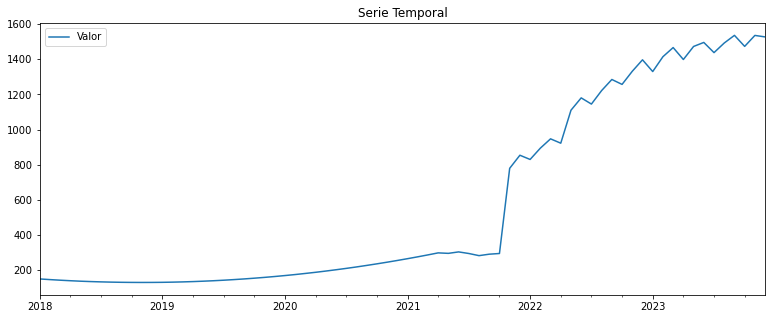

In [121]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_tend2,params_ARMA1,15,40)

,Valor
2018-01-31,200.127730
2018-02-28,200.420665
2018-03-31,200.835007
2018-04-30,201.167572
2018-05-31,201.351639
...,...
2023-08-31,264.759040
2023-09-30,247.932644
2023-10-31,271.984986
2023-11-30,243.503153


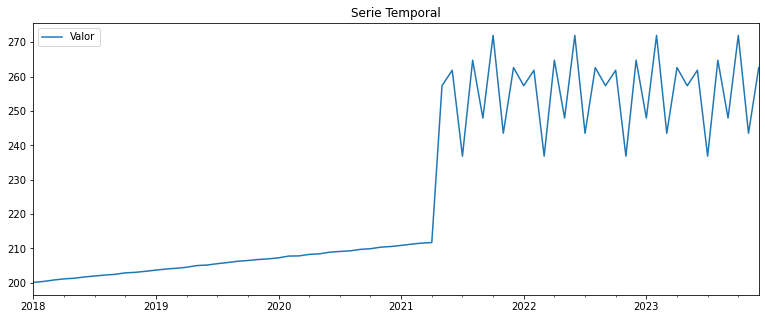

In [122]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_tend1,params_per2,16,40)

,Valor
2018-01-01,341.170569
2018-01-02,367.737513
2018-01-03,384.035244
2018-01-04,354.723049
2018-01-05,337.401372
...,...
2018-03-21,214.000000
2018-03-22,209.000000
2018-03-23,209.000000
2018-03-24,213.000000


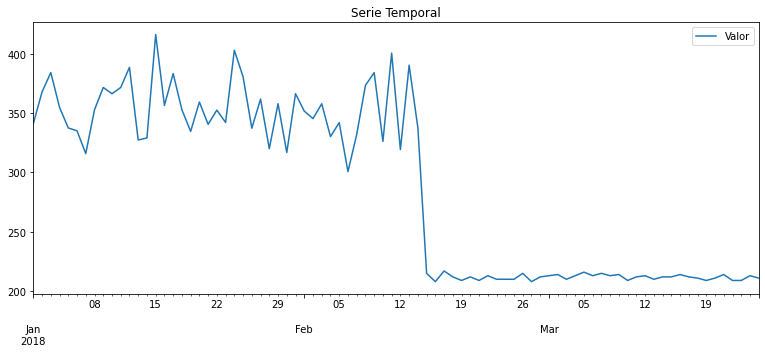

In [123]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,paramsD1,paramsD2,1,45)

,Valor
2018-01-01,322.841365
2018-01-02,368.223809
2018-01-03,387.885857
2018-01-04,355.463448
2018-01-05,332.735226
...,...
2018-03-21,1529.901752
2018-03-22,1532.410205
2018-03-23,1585.792361
2018-03-24,1564.894207


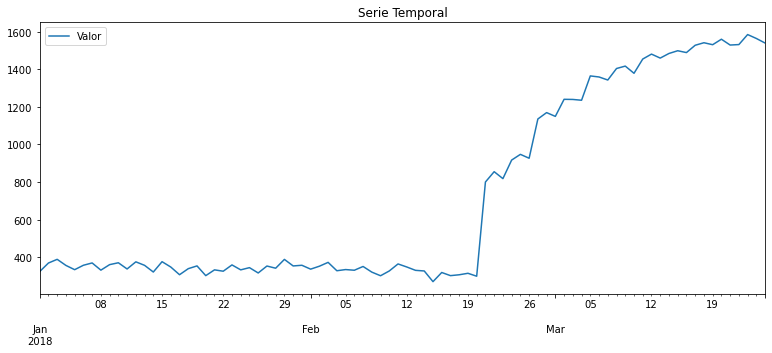

In [124]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,paramsD1,params_ARMA1,2,45)

,Valor
2018-01-01,212.000000
2018-01-02,215.000000
2018-01-03,211.000000
2018-01-04,212.000000
2018-01-05,216.000000
...,...
2018-03-21,280.439662
2018-03-22,239.727125
2018-03-23,220.557840
2018-03-24,250.761260


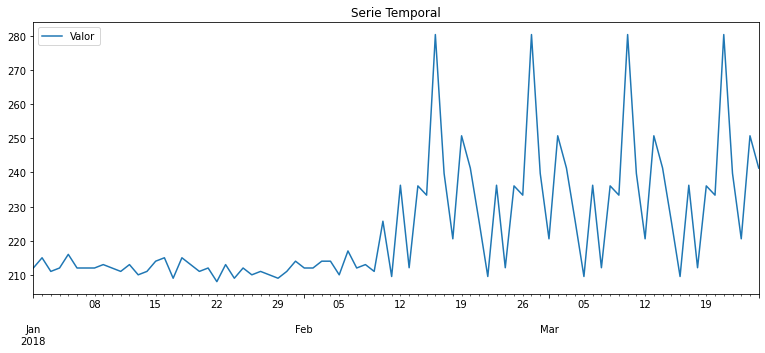

In [125]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,paramsD2,params_per2,3,40)

,Valor
2018-01-01,321.216013
2018-01-02,329.535867
2018-01-03,365.904997
2018-01-04,367.781556
2018-01-05,363.951667
...,...
2018-03-21,298.300313
2018-03-22,310.018509
2018-03-23,322.246098
2018-03-24,334.812490


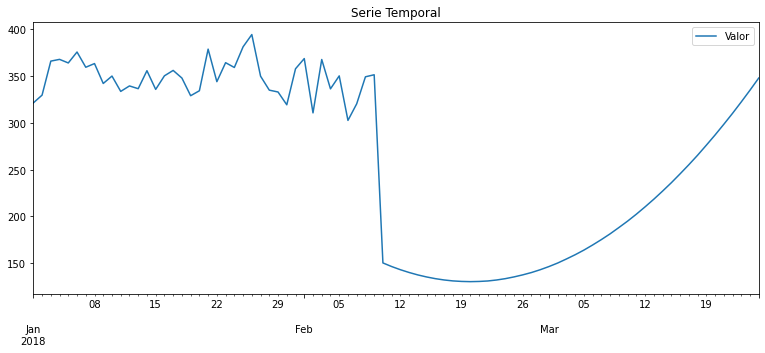

In [126]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,paramsD1,params_tend2,4,40)

,Valor
2018-01-01,300.362277
2018-01-02,312.978843
2018-01-03,302.101247
2018-01-04,293.503155
2018-01-05,320.414647
...,...
2018-03-21,3894.060587
2018-03-22,3898.017242
2018-03-23,3928.074955
2018-03-24,3961.437030


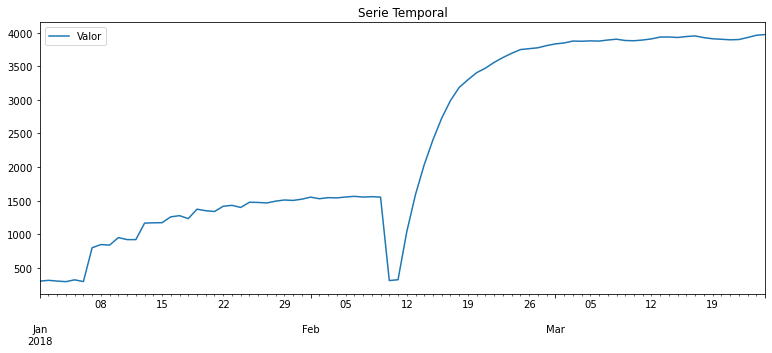

In [127]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_ARMA1,params_ARMA2,5,40)

,Valor
2018-01-01,278.263355
2018-01-02,320.667677
2018-01-03,298.971130
2018-01-04,308.689124
2018-01-05,288.607453
...,...
2018-03-21,378.767962
2018-03-22,303.353227
2018-03-23,349.339526
2018-03-24,353.241781


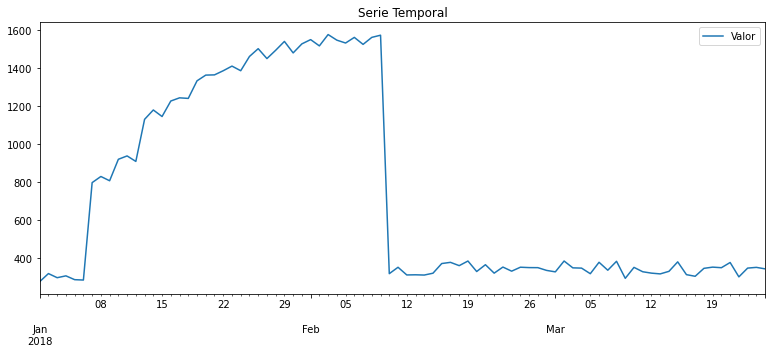

In [128]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_ARMA1,paramsD1,6,40)

,Valor
2018-01-01,301.504091
2018-01-02,296.028909
2018-01-03,315.510676
2018-01-04,317.660937
2018-01-05,290.110367
...,...
2018-03-21,233.705038
2018-03-22,264.038153
2018-03-23,243.791889
2018-03-24,285.988271


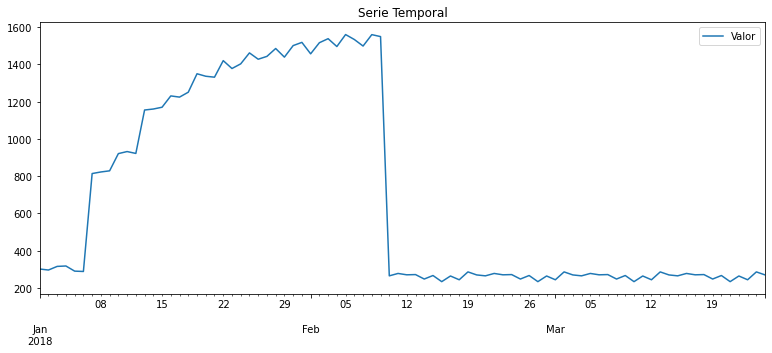

In [129]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_ARMA1,params_per2,7,40)

,Valor
2018-01-01,313.552564
2018-01-02,325.668354
2018-01-03,1037.912808
2018-01-04,1620.594155
2018-01-05,2088.195263
...,...
2018-03-21,298.347172
2018-03-22,310.002874
2018-03-23,322.333806
2018-03-24,334.919371


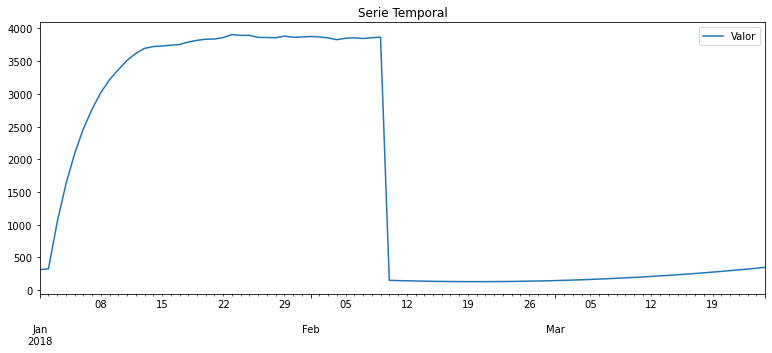

In [130]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_ARMA2,params_tend2,8,40)

,Valor
2018-01-01,220.907437
2018-01-02,191.338648
2018-01-03,216.284351
2018-01-04,186.297667
2018-01-05,220.907437
...,...
2018-03-21,248.051460
2018-03-22,221.174940
2018-03-23,234.341676
2018-03-24,247.150035


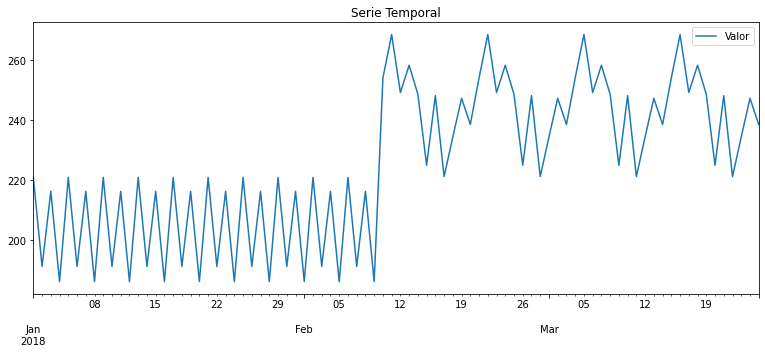

In [131]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_per1,params_per2,9,40)

,Valor
2018-01-01,227.481732
2018-01-02,233.361865
2018-01-03,225.051871
2018-01-04,236.781560
2018-01-05,205.382759
...,...
2018-03-21,212.000000
2018-03-22,208.000000
2018-03-23,213.000000
2018-03-24,214.000000


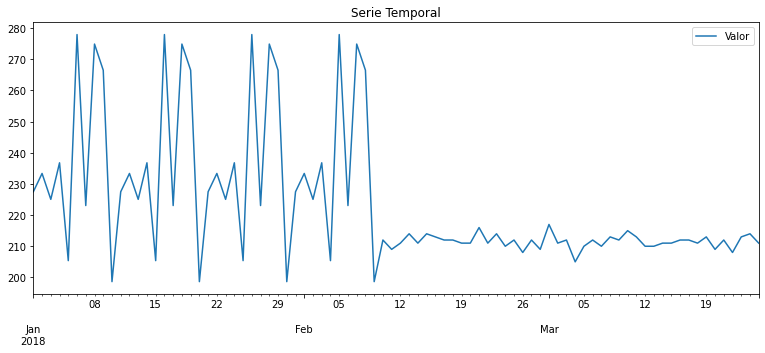

In [132]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_per2,paramsD2,10,40)

,Valor
2018-01-01,262.893664
2018-01-02,262.464720
2018-01-03,227.089046
2018-01-04,259.384296
2018-01-05,241.730148
...,...
2018-03-21,3863.995750
2018-03-22,3861.988170
2018-03-23,3901.925094
2018-03-24,3912.767152


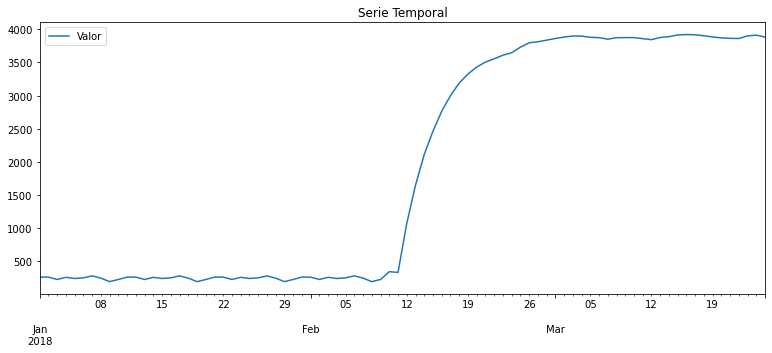

In [133]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_per2,params_ARMA2,11,40)

,Valor
2018-01-01,219.374384
2018-01-02,209.388168
2018-01-03,199.300782
2018-01-04,193.506734
2018-01-05,219.374384
...,...
2018-03-21,211.740356
2018-03-22,212.206859
2018-03-23,212.450860
2018-03-24,212.815404


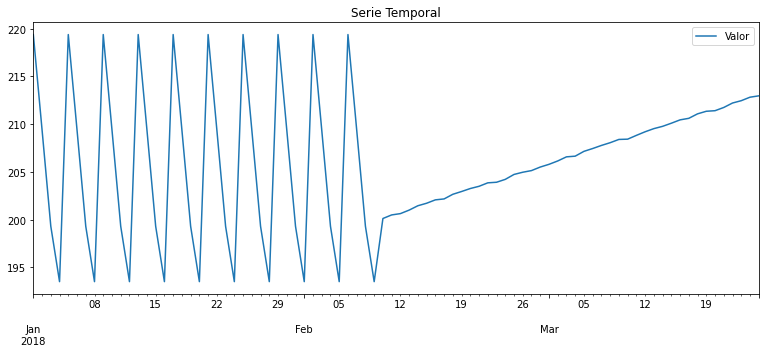

In [134]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_per1,params_tend1,12,40)

,Valor
2018-01-01,200.055299
2018-01-02,200.533653
2018-01-03,200.620048
2018-01-04,200.982837
2018-01-05,201.264657
...,...
2018-03-21,298.226304
2018-03-22,310.003925
2018-03-23,322.304988
2018-03-24,334.896773


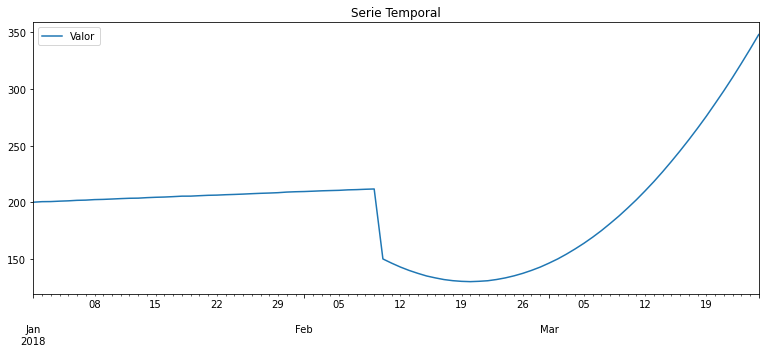

In [135]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_tend1,params_tend2,13,40)

,Valor
2018-01-01,150.022343
2018-01-02,146.347695
2018-01-03,142.825384
2018-01-04,139.802904
2018-01-05,137.207162
...,...
2018-03-21,213.000000
2018-03-22,211.000000
2018-03-23,211.000000
2018-03-24,213.000000


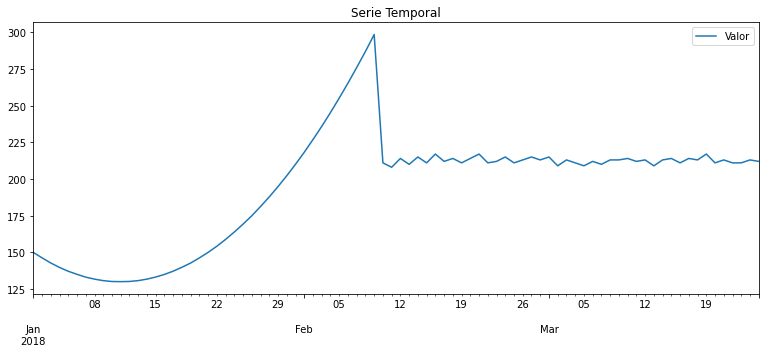

In [136]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_tend2,paramsD2,14,40)

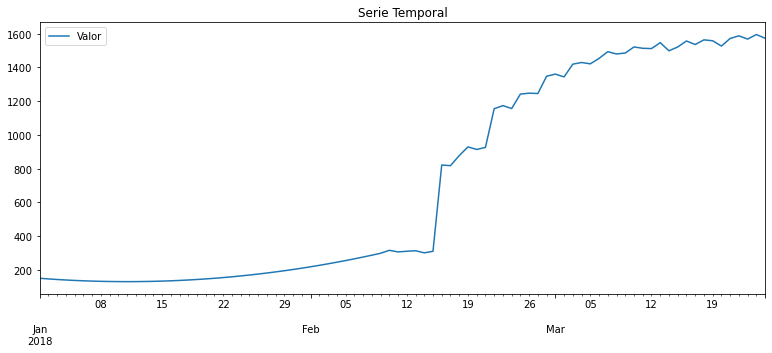

In [149]:
df2=crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_tend2,params_ARMA1,15,40)

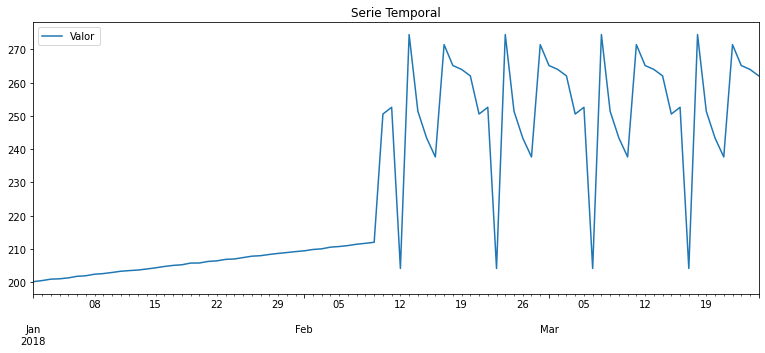

In [138]:
df1=crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_tend1,params_per2,16,40)

In [158]:
def csv_df(df,folder,file):
    filepath = Path(folder + '/'+ file +'.csv')  
    filepath.parent.mkdir(parents=True, exist_ok=True)  
    df.to_csv(filepath,index_label='indice')

In [159]:
csv_df(df2,'Ejemplos','ejemplo2')

In [157]:
csv_df(df2,'Ejemplos','ejemplo')